# Deep Learning

# Assignment 1

### Submitted by:
#### Name      : Muhammad Amin Ghias
#### ERP ID    : 25366

Date : 2nd October 2022

# Building a neural network and recording the trends of each neuron

# Importing Libraries

In [1]:
import pandas as pd
import numpy as np

from numpy.random import normal
from numpy.random import exponential
import random

import matplotlib.pyplot as plt

# Importing dataset

In [2]:
df=pd.read_csv('Advertising.csv')
df.head()

,S_No,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


## Making datase X and Y 

In [3]:
df1=df[['TV','radio','newspaper']]
df1.head()

,TV,radio,newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4


In [4]:
y=df['sales']
y=np.array(y)


In [5]:
y.shape

(200,)

In [6]:
df1.shape

(200, 3)

In [7]:
x=df1
x=np.array(x)
x

array([[230.1,  37.8,  69.2],
       [ 44.5,  39.3,  45.1],
       [ 17.2,  45.9,  69.3],
       [151.5,  41.3,  58.5],
       [180.8,  10.8,  58.4],
       [  8.7,  48.9,  75. ],
       [ 57.5,  32.8,  23.5],
       [120.2,  19.6,  11.6],
       [  8.6,   2.1,   1. ],
       [199.8,   2.6,  21.2],
       [ 66.1,   5.8,  24.2],
       [214.7,  24. ,   4. ],
       [ 23.8,  35.1,  65.9],
       [ 97.5,   7.6,   7.2],
       [204.1,  32.9,  46. ],
       [195.4,  47.7,  52.9],
       [ 67.8,  36.6, 114. ],
       [281.4,  39.6,  55.8],
       [ 69.2,  20.5,  18.3],
       [147.3,  23.9,  19.1],
       [218.4,  27.7,  53.4],
       [237.4,   5.1,  23.5],
       [ 13.2,  15.9,  49.6],
       [228.3,  16.9,  26.2],
       [ 62.3,  12.6,  18.3],
       [262.9,   3.5,  19.5],
       [142.9,  29.3,  12.6],
       [240.1,  16.7,  22.9],
       [248.8,  27.1,  22.9],
       [ 70.6,  16. ,  40.8],
       [292.9,  28.3,  43.2],
       [112.9,  17.4,  38.6],
       [ 97.2,   1.5,  30. ],
       [26

In [8]:
x.shape

(200, 3)

# Making Class of neural network

In [9]:



class ann():
    
    def __init__(self,size_input_layer,size_hidden_layer,number_hidden_layer,size_output_layer):

        self.size_input_layer=size_input_layer
        self.size_hidden_layer=size_hidden_layer
        self.number_hidden_layer=number_hidden_layer
        self.size_output_layer=size_output_layer
        
        self.weights = {}
        self.bias={}
        self.weights_individual={}
        self.bias_individual={}

        self.Z={}
        self.A={}
        self.Z_individual={}
        self.A_individual={}

        self.dZ={}
        self.dW={}
        self.db={}
        
        self.dZ_individual={}
        self.dW_individual={}
        self.db_individual={}
        
        self.cost=[]
        self.cost_mean=[]
 
        self.hidden_layers=[size_hidden_layer]*number_hidden_layer
        self.layers_shape=[size_input_layer]
        
        for i in self.hidden_layers:
             self.layers_shape.append(i)
             
        self.layers_shape.append(size_output_layer)
    
        
    def initialize_weight_bias(self):
        
        # Initializing weights 
        self.weights_r = {}
        self.bias_r={}
        self.weights_individual_r={}
        self.bias_individual_r={}

        for k in range(len(self.layers_shape)-1):
            
            self.weights['W' + str(k+1)] =[]
            
            a=self.weights_r['W' + str(k+1)] = np.random.randn( self.layers_shape[k], self.layers_shape[k+1]) * 0.01
            self.weights['W' + str(k+1)].append(a)
            
            self.bias['b' + str(k+1)] = []
            b=self.bias_r['b' + str(k+1)] = np.zeros(( 1, self.layers_shape[k+1]))
            self.bias['b' + str(k+1)].append(b)
            

        for i in range(len(self.weights_r)):
       
            for j in range(self.weights_r['W'+str(i+1)].shape[1]):
 
                for k in range(self.weights_r['W'+str(i+1)].shape[0]):
                    
                    self.weights_individual['w'+str(i+1)+'_'+str(j+1)+str(k+1)]=[]
  
                    h=self.weights_individual_r['w'+str(i+1)+'_'+str(j+1)+str(k+1)]= self.weights_r['W'+str(i+1)][k][j]

                    self.weights_individual['w'+str(i+1)+'_'+str(j+1)+str(k+1)].append(h)
         
  
        for i in range(len(self.bias_r)):
        
            for j in range(self.bias_r['b'+str(i+1)].shape[1]):
                for k in range(self.bias_r['b'+str(i+1)].shape[0]):
            
                    self.bias_individual['b'+str(i+1)+'_'+str(j+1)] = []
                    h=self.bias_individual_r['b'+str(i+1)+'_'+str(j+1)]= self.bias_r['b'+str(i+1)][k][j]
                    
                    self.bias_individual['b'+str(i+1)+'_'+str(j+1)].append(h)
                    

                    
        for k in range(1,len(self.layers_shape)):

            self.Z['Z' + str(k)] = []
            self.A['A' + str(k)] = []

        for i in range(len(self.Z)):

            for j in range(self.layers_shape[i+1]):
                h=self.Z_individual['Z'+str(i+1)+'_'+str(j+1)]= []
                

        for i in range(len(self.A)):

            for j in range(self.layers_shape[i+1]):
                h=self.A_individual['A'+str(i+1)+'_'+str(j+1)]= []

        for k in reversed(range(1,len(self.layers_shape))):

            self.dZ['dZ' + str(k)] = []
    
        for i in reversed(range(len(self.dZ))):

            for j in range(self.layers_shape[i+1]):
                h=self.dZ_individual['dZ'+str(i+1)+'_'+str(j+1)]= []
   
        for k in reversed(range(1,len(self.Z)+1)):

            self.dW['dW'+str(k)] = []                           
            self.db['db'+str(k)]= []
            
            if k > 1:
                self.dZ['dZ'+str(k-1)]= []

        for i in range(len(self.dW)):

            for j in range(self.layers_shape[i+1]):
                for k in range(self.layers_shape[i]):
                    h=self.dW_individual['dw'+str(i+1)+'_'+str(j+1)+str(k+1)]= []

        for i in range(len(self.db)):

            for j in range(self.layers_shape[i+1]):
                        for k in range(self.layers_shape[i]):
                            h=self.db_individual['db'+str(i+1)+'_'+str(j+1)]= []
                                    

    def input(self,input_X,output_y):
        self.X =input_X     
        self.y = output_y
        self.A['A0']=input_X
       
                    
    def layer_outputs(self,activation_function):
        
        self.activation_function=activation_function
  
        self.A_r={'A0':self.X}
        self.Z_r={}
        self.Z_individual_r={}
        self.A_individual_r={}
        
        def sigmoid(z):
            return 1.0 / (1 + np.exp(-z))
        def sigmoid_derivative(z):
            return sigmoid(z) * (1.0 - sigmoid(z))
        
        def relu(z):
   
            return np.maximum(0,z)
        
        def relu_derivative(z):
            return np.greater(z, 0.).astype(np.float32)

            
        def tanh(z):
            return(np.exp(z)-np.exp(-z))/(np.exp(z)+np.exp(-z))
        
        def tanh_derivative(z):
            t=(np.exp(z)-np.exp(-z))/(np.exp(z)+np.exp(-z))
            dt=1-t**2
            return(dt)
        

        for k in range(1,len(self.layers_shape)):

            b=self.Z_r['Z' + str(k)]=np.matmul(self.A_r['A'+str(k-1)] , self.weights_r['W'+str(k)]) + self.bias_r['b'+str(k)]
            
            a=self.Z['Z' + str(k)].append(np.matmul(self.A['A'+str(k-1)] , self.weights_r['W'+str(k)]) + self.bias_r['b'+str(k)])
            
            
            if self.activation_function == 'sigmoid':
                c=self.A_r['A' + str(k)]=((sigmoid(b)))
                
            elif self.activation_function == 'relu':
                c=self.A_r['A' + str(k)]=((relu(b)))
                
                
            elif self.activation_function == 'tanh':
                c=self.A_r['A' + str(k)]=((tanh(b)))
                # print(c)
                

            
            self.A['A' + str(k)].append(c)


        for i in range(len(self.Z_r)):

            for j in range(self.Z_r['Z'+str(i+1)].shape[1]):

                for k in range(self.Z_r['Z'+str(i+1)].shape[0]):
                    
                    d=self.Z_individual_r['Z'+str(i+1)+'_'+str(j+1)]=self.Z_r['Z'+str(i+1)][k][j]
      
                    h=self.Z_individual['Z'+str(i+1)+'_'+str(j+1)].append(d)
 


        for i in range(len(self.A_r)-1):
        
            for j in range(self.A_r['A'+str(i+1)].shape[1]):
                for k in range(self.A_r['A'+str(i+1)].shape[0]):

                    r=self.A_individual_r['A'+str(i+1)+'_'+str(j+1)]=self.A_r['A'+str(i+1)][k][j]

                    self.A_individual['A'+str(i+1)+'_'+str(j+1)].append(r)


                    
                    
    def cost_func(self,y):
        
        a = self.A_r['A'+str(len(self.A_r)-1)]

        self.y=y
 
        self.cost_r=[]
        self.cost_mean_r=[]
        
        q=self.cost_r=(y - a) ** 2
        
        self.cost.append(q)
        
        e=self.cost_mean_r=np.mean((y - a) ** 2)
        
        self.cost_mean.append(e)

        # print('mean cost',self.cost_mean)
  
        
           
    def back_prpogation(self):

        self.dZ_r={}
        self.dW_r={}
        self.db_r={}
        
        self.dZ_individual_r={}
        self.dW_individual_r={}
        self.db_individual_r={}

        
        def sigmoid(z):
            return 1.0 / (1 + np.exp(-z))
        def sigmoid_derivative(z):
            return sigmoid(z) * (1.0 - sigmoid(z))
        
        def relu(z):
            return np.maximum(0,z)
        
        
        def relu_derivative(z):
            return np.greater(z, 0.).astype(np.float32)

            
        def tanh(z):
            return(np.exp(z)-np.xzp(-z))/(np.exp(z)+np.exp(-z))
        
        def tanh_derivative(z):
            t=(np.exp(z)-np.exp(-z))/(np.exp(z)+np.exp(-z))
            dt=1-t**2
            return(dt)

        i= len(self.Z_r)
        

        r=self.dZ_r['dZ'+str(len(self.Z_r))]=self.A_r['A'+str(i)]-self.y
        
        self.dZ['dZ'+str(len(self.Z_r))].append(r)
        

        for k in reversed(range(1,i+1)):

            p=self.dW_r['dW'+str(k)]=np.matmul(self.A_r['A'+str(k-1)].T, self.dZ_r['dZ'+str(k)])
            
            self.dW['dW'+str(k)].append(p)

            
            s=self.db_r['db'+str(k)]=self.dZ_r['dZ'+str(k)]
                                        
            self.db['db'+str(k)].append(s)

            if k > 1:
                
                if self.activation_function == 'sigmoid':
                    d=self.dZ_r['dZ'+str(k-1)]= np.matmul(self.dZ_r['dZ'+str(k)], np.array(self.dW_r['dW'+str(k)]).T) * sigmoid_derivative(self.Z_r['Z'+str(k-1)])
                    
                    
                elif self.activation_function == 'relu':
                    d=self.dZ_r['dZ'+str(k-1)]= np.matmul(self.dZ_r['dZ'+str(k)], np.array(self.dW_r['dW'+str(k)]).T) * relu_derivative(self.Z_r['Z'+str(k-1)])
                  
                elif self.activation_function == 'tanh':
                    d=self.dZ_r['dZ'+str(k-1)]= np.matmul(self.dZ_r['dZ'+str(k)], np.array(self.dW_r['dW'+str(k)]).T) * tanh_derivative(self.Z_r['Z'+str(k-1)])
                    # print(d)
 
                self.dZ['dZ'+str(k-1)].append(d)
                
         
                
        
        for i in range(len(self.dZ_r)):
        
            for j in range(self.dZ_r['dZ'+str(i+1)].shape[1]):
                for k in range(self.dZ_r['dZ'+str(i+1)].shape[0]):

                    h=self.dZ_individual_r['dZ'+str(i+1)+'_'+str(j+1)]= self.dZ_r['dZ'+str(i+1)][k][j]

                    self.dZ_individual['dZ'+str(i+1)+'_'+str(j+1)].append(h)
                    

                    
        
        
              
        for i in range(len(self.dW_r)):

            for j in range(self.dW_r['dW'+str(i+1)].shape[1]):
                for k in range(self.bias_r['b'+str(i+1)].shape[0]):
                    
                    h=self.dW_individual_r['dw'+str(i+1)+'_'+str(j+1)+str(k+1)]= self.dW_r['dW'+str(i+1)][k][j]

                    self.dW_individual['dw'+str(i+1)+'_'+str(j+1)+str(k+1)].append(h)
                    

        for i in range(len(self.db)):

            for j in range(self.db_r['db'+str(i+1)].shape[1]):
                        for k in range(self.db_r['db'+str(i+1)].shape[0]):
                            h=self.db_individual_r['db'+str(i+1)+'_'+str(j+1)]= self.db_r['db'+str(i+1)][k][j]

                            self.db_individual['db'+str(i+1)+'_'+str(j+1)].append(h)
                            

    def update_weights(self,learning_rate):
        
        self.learning_rate=learning_rate
        
        m = np.array(self.X).shape[0]

        
        for i in range(len(self.weights_r)):
            
            a= self.weights_r['W'+str(i+1)]= self.weights_r['W'+str(i+1)] -  (self.learning_rate*self.dW_r['dW'+str(i+1)])/m
            
            self.weights['W'+str(i+1)].append(a)
            
            b= self.bias_r['b'+str(i+1)]= self.bias_r['b'+str(i+1)] -  (self.learning_rate*self.db_r['db'+str(i+1)])/m
            self.bias['b'+str(i+1)].append(b)
            
        
        for i in range(len(self.weights_r)):
       
            for j in range(self.weights_r['W'+str(i+1)].shape[1]):
 
                for k in range(self.weights_r['W'+str(i+1)].shape[0]):

  
                    h=self.weights_individual_r['w'+str(i+1)+'_'+str(j+1)+str(k+1)]= self.weights_r['W'+str(i+1)][k][j]

                    
                    self.weights_individual['w'+str(i+1)+'_'+str(j+1)+str(k+1)].append(h)
                    
  
        for i in range(len(self.bias_r)):
        
            for j in range(self.bias_r['b'+str(i+1)].shape[1]):
                for k in range(self.bias_r['b'+str(i+1)].shape[0]):

                    h=self.bias_individual_r['b'+str(i+1)+'_'+str(j+1)]= self.bias_r['b'+str(i+1)][k][j]
                    

                    
                    self.bias_individual['b'+str(i+1)+'_'+str(j+1)].append(h)
                    

    def plot_bias(self):
        
        
        for i in range(len(self.bias_r)):
        
            for j in range(self.bias_r['b'+str(i+1)].shape[1]):
                for k in range(self.bias_r['b'+str(i+1)].shape[0]):

                    h=self.bias_individual['b'+str(i+1)+'_'+str(j+1)]
                    plt.figure(figsize=(12,8))
                    plt.plot(h)
                    plt.title('b'+str(i+1)+'_'+str(j+1))
                    plt.show
                    
                    
    def plot_weights(self):
        
        for i in range(len(self.weights_r)):
       
            for j in range(self.weights_r['W'+str(i+1)].shape[1]):
 
                for k in range(self.weights_r['W'+str(i+1)].shape[0]):

  
                    h=self.weights_individual['w'+str(i+1)+'_'+str(j+1)+str(k+1)]
                    
                    plt.figure(figsize=(12,8))
                    plt.plot(h)
                    plt.title('w'+str(i+1)+'_'+str(j+1)+str(k+1))
                    plt.show
                    
                    
    def plot_dW(self):
         for i in range(len(self.dW_r)):

            for j in range(self.dW_r['dW'+str(i+1)].shape[1]):
                for k in range(self.bias_r['b'+str(i+1)].shape[0]):
                    
                    h=self.dW_individual['dw'+str(i+1)+'_'+str(j+1)+str(k+1)]
                    
                    plt.figure(figsize=(12,8))
                    plt.plot(h)
                    plt.title('dw'+str(i+1)+'_'+str(j+1)+str(k+1))
                    plt.show
                    
                    
    def plot_db(self):
         for i in range(len(self.db)):

            for j in range(self.db_r['db'+str(i+1)].shape[1]):
                        for k in range(self.db_r['db'+str(i+1)].shape[0]):
                            h=self.db_individual['db'+str(i+1)+'_'+str(j+1)]
                            
                            plt.figure(figsize=(12,8))
                            plt.plot(h)
                            plt.title('db'+str(i+1)+'_'+str(j+1))
                            plt.show
                            
    def plot_dZ(self):
        for i in range(len(self.dZ_r)):
        
            for j in range(self.dZ_r['dZ'+str(i+1)].shape[1]):
                for k in range(self.dZ_r['dZ'+str(i+1)].shape[0]):

                    h=self.dZ_individual['dZ'+str(i+1)+'_'+str(j+1)]
                    plt.figure(figsize=(12,8))
                    plt.plot(h)
                    plt.title('dZ'+str(i+1)+'_'+str(j+1))
                    plt.show
            
                
            
    def plot_cost(self):
        
        h=self.cost_mean
        plt.figure(figsize=(12,8))
        plt.plot(h)
        plt.title('Mean Cost')
        plt.show
        

        
        
    def plot_A(self):
        for i in range(len(self.A_r)-1):
    
            for j in range(self.A_r['A'+str(i+1)].shape[1]):
                for k in range(self.A_r['A'+str(i+1)].shape[0]):

                    h=self.A_individual['A'+str(i+1)+'_'+str(j+1)]
                   
                    plt.figure(figsize=(12,8))
                    plt.plot(h)
                    plt.title('A'+str(i+1)+'_'+str(j+1))
                    plt.show
        
    def plot_Z(self):
        
        for i in range(len(self.Z_r)):

            for j in range(self.Z_r['Z'+str(i+1)].shape[1]):

                for k in range(self.Z_r['Z'+str(i+1)].shape[0]):
                    
                    h=self.Z_individual['Z'+str(i+1)+'_'+str(j+1)]
                    plt.figure(figsize=(12,8))
                    plt.plot(h)
                    plt.title('Z'+str(i+1)+'_'+str(j+1))
                    plt.show

        
        


# Making function for running epochs

### Using SGD

In [10]:


def run_epochs(network_name, x,y,epoch,activation,learning_rate):
    
    for c in range(1,epoch):
        print('epoch :',c)
 

        n=1
        k=n
        s=0
        for i in range(int(len(x)/n)):
    
            X=(x[s:k])
            Y=(y[s:k])
 
            network_name.input(X,Y)
            
            network_name.layer_outputs(activation)

            network_name.cost_func(Y)
            network_name.back_prpogation()

            network_name.update_weights(learning_rate)
            
            
            s=s+n
            k=k+n

# Using Relu Activation function

In [11]:
# ann(size_input_layer,size_hidden_layer,number_hidden_layer,size_output_layer)

nn_r = ann(3,3,2,1)
nn_r.initialize_weight_bias()

# run_epochs(network_name, x,y,epoch,activation,learning_rate

run_epochs(nn_r,x,y,10,'relu',0.2)

epoch : 1
epoch : 2
epoch : 3
epoch : 4
epoch : 5
epoch : 6
epoch : 7
epoch : 8
epoch : 9


### Shape of the network is [3, 3, 3, 1] 

3 input neurons, 2 hidden layers of 3 neurons each and output layer of 1 neuron

In [31]:
nn_r.layers_shape

[3, 3, 3, 1]

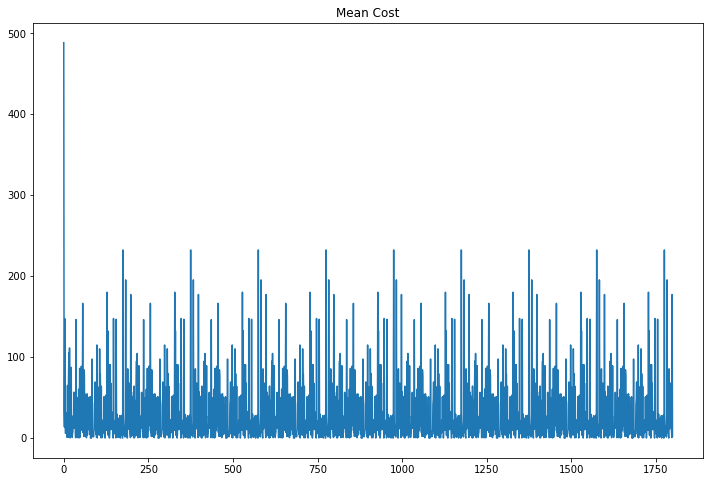

In [12]:
nn_r.plot_cost()

# Using Sigmoid Activation function

In [13]:
# ann(size_input_layer,size_hidden_layer,number_hidden_layer,size_output_layer)
nn_s = ann(3,3,2,1)
nn_s.initialize_weight_bias()

# run_epochs(network_name, x,y,epoch,activation,learning_rate

run_epochs(nn_s,x,y,10,'sigmoid',0.2)

epoch : 1
epoch : 2
epoch : 3


<ipython-input-9-6ea268dd62e5>:147: RuntimeWarning: overflow encountered in exp
  return 1.0 / (1 + np.exp(-z))
<ipython-input-9-6ea268dd62e5>:248: RuntimeWarning: overflow encountered in exp
  return 1.0 / (1 + np.exp(-z))


epoch : 4
epoch : 5
epoch : 6
epoch : 7
epoch : 8
epoch : 9


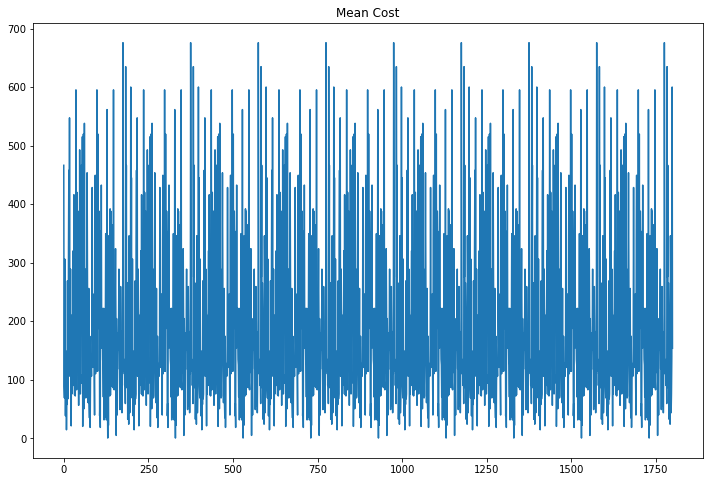

In [14]:
nn_s.plot_cost()

# Using tanh Activation function

In [15]:
# ann(size_input_layer,size_hidden_layer,number_hidden_layer,size_output_layer)
nn_t = ann(3,3,2,1)
nn_t.initialize_weight_bias()

# run_epochs(network_name, x,y,epoch,activation,learning_rate

run_epochs(nn_t,x,y,10,'tanh',0.2)

epoch : 1
epoch : 2
epoch : 3


<ipython-input-9-6ea268dd62e5>:160: RuntimeWarning: overflow encountered in exp
  return(np.exp(z)-np.exp(-z))/(np.exp(z)+np.exp(-z))
<ipython-input-9-6ea268dd62e5>:160: RuntimeWarning: invalid value encountered in divide
  return(np.exp(z)-np.exp(-z))/(np.exp(z)+np.exp(-z))
<ipython-input-9-6ea268dd62e5>:264: RuntimeWarning: overflow encountered in exp
  t=(np.exp(z)-np.exp(-z))/(np.exp(z)+np.exp(-z))
<ipython-input-9-6ea268dd62e5>:264: RuntimeWarning: invalid value encountered in divide
  t=(np.exp(z)-np.exp(-z))/(np.exp(z)+np.exp(-z))


epoch : 4
epoch : 5
epoch : 6
epoch : 7
epoch : 8
epoch : 9


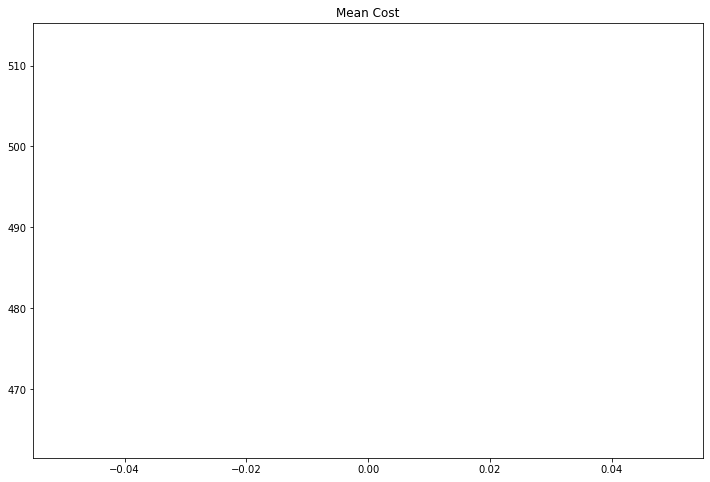

In [16]:
nn_t.plot_cost()

#### Comparing the 3 activation functions the cost function of Relu is better and smoother

# Comparing Relu and sigmoid plots

## Activation outputs A plots Sigmoid

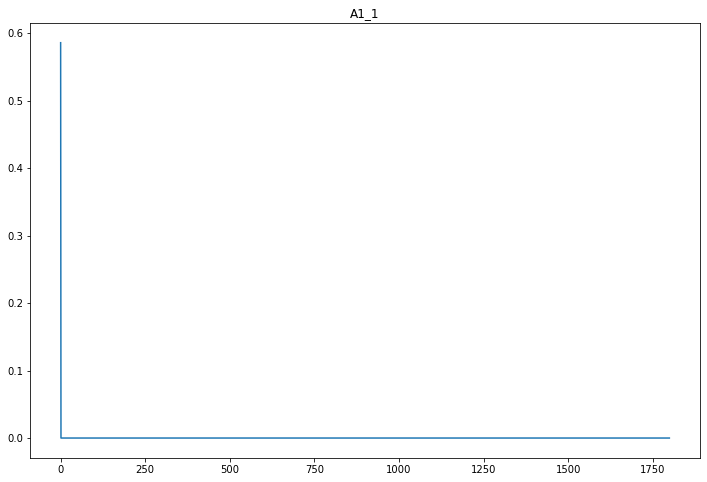

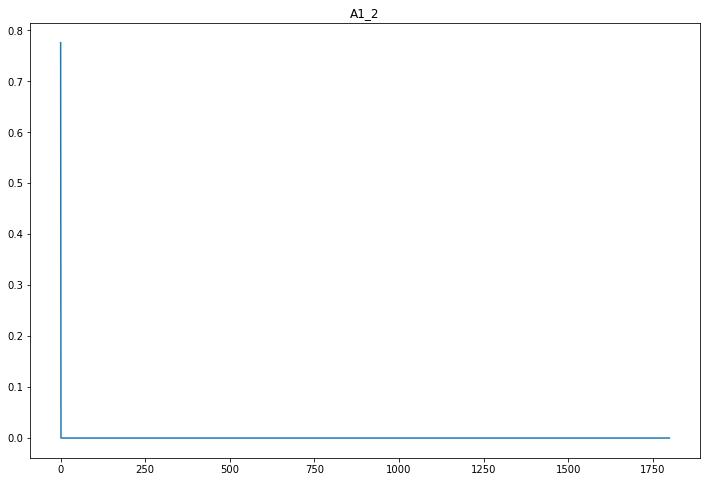

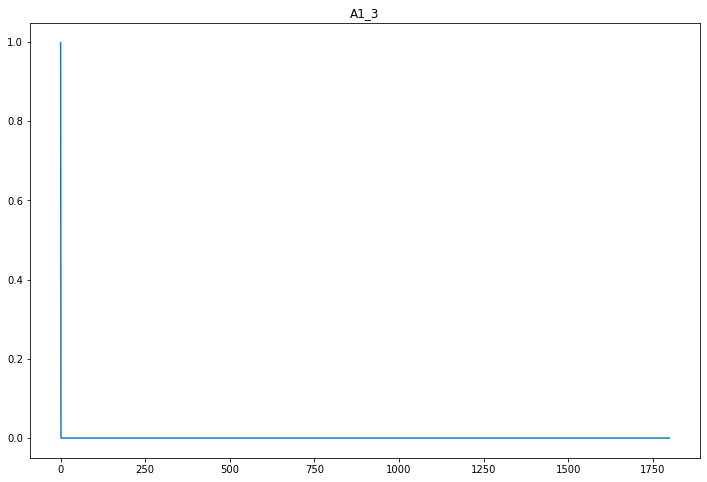

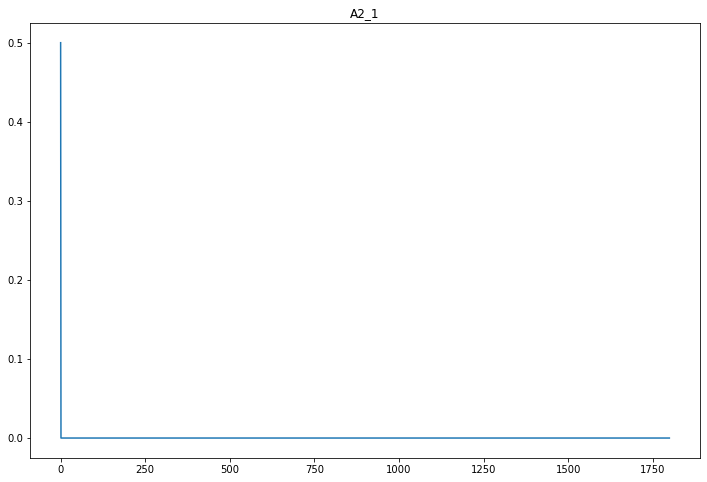

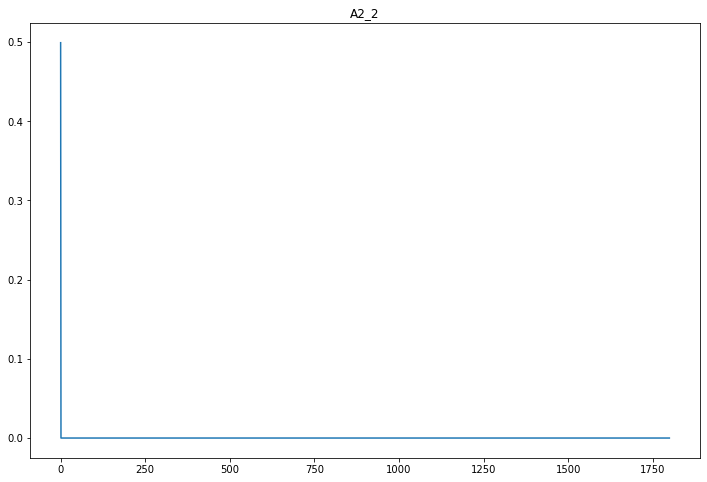

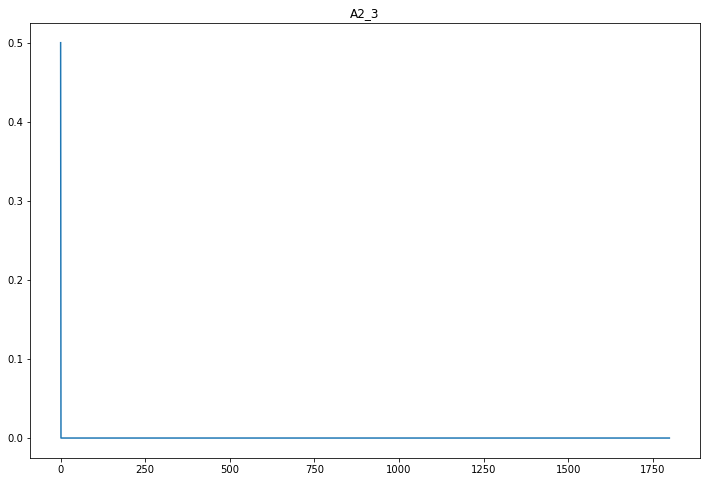

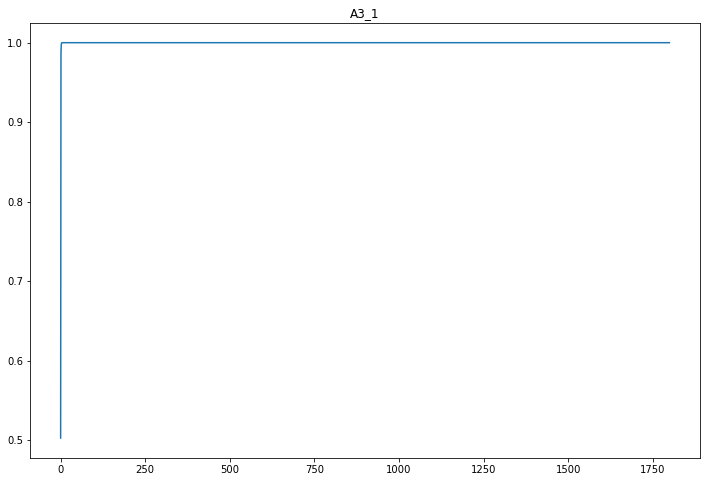

In [17]:
nn_s.plot_A()

#### For sigmoid the output of each neuron is relatively smooth

## Activation outputs A plots Relu

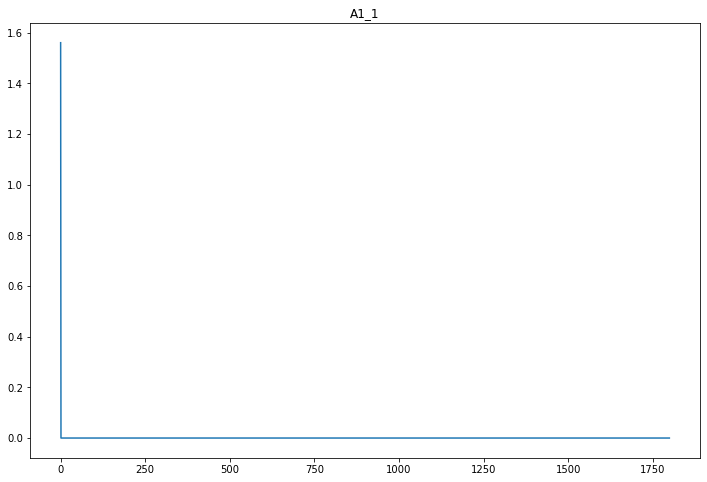

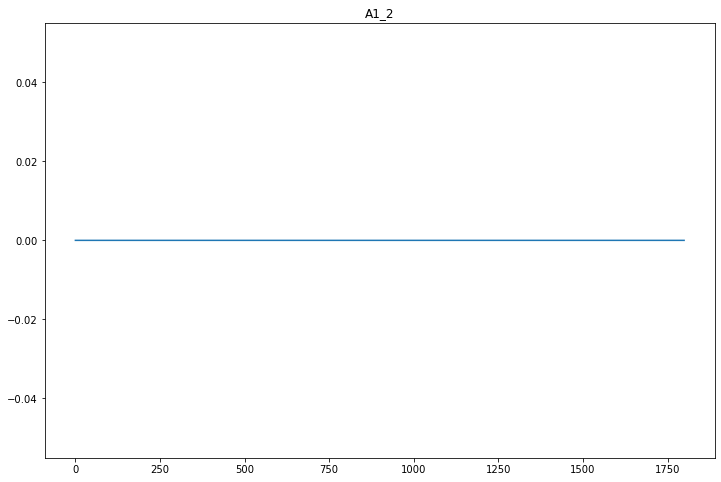

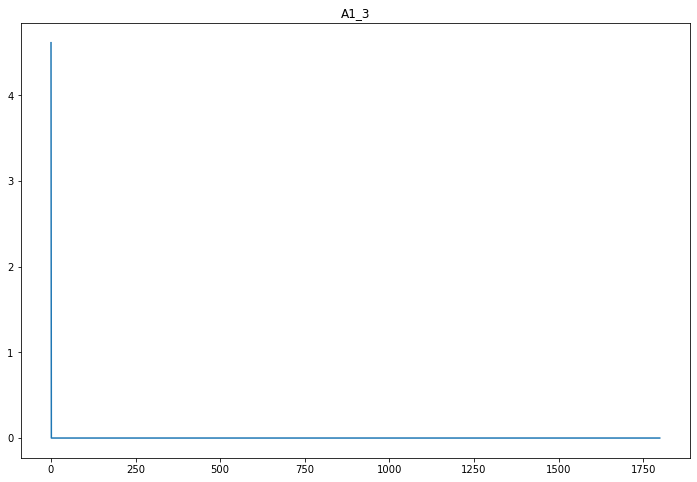

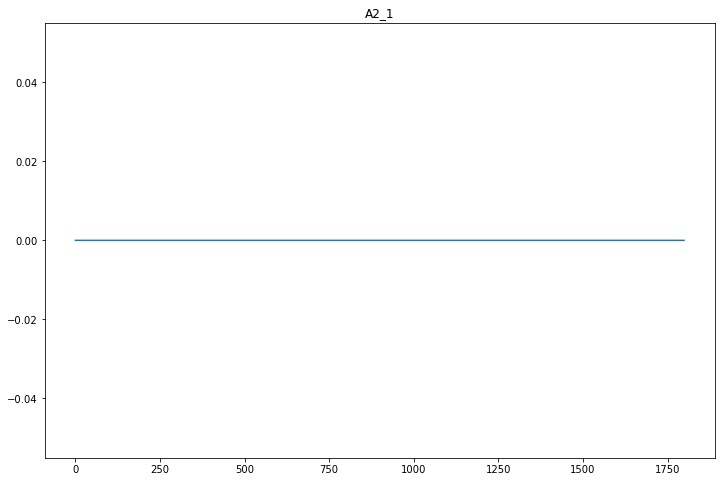

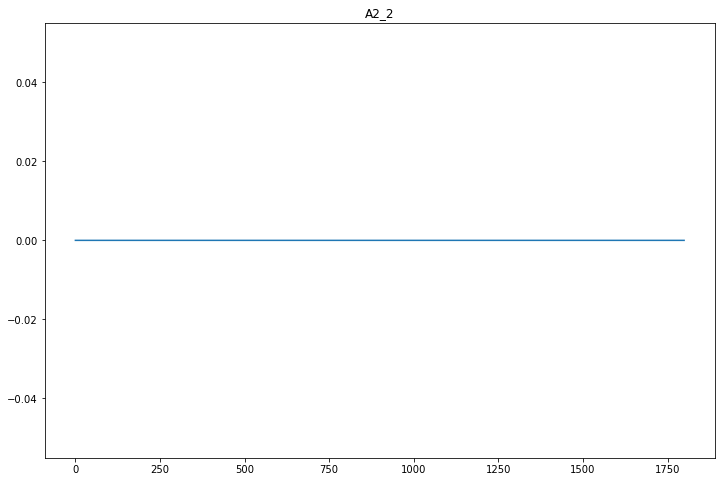

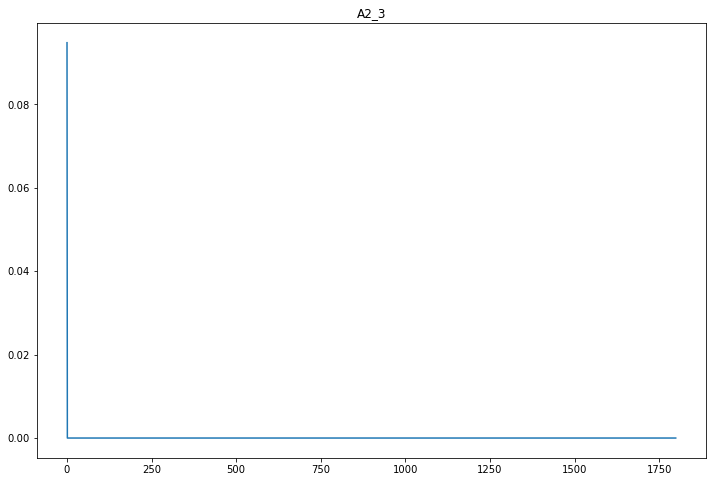

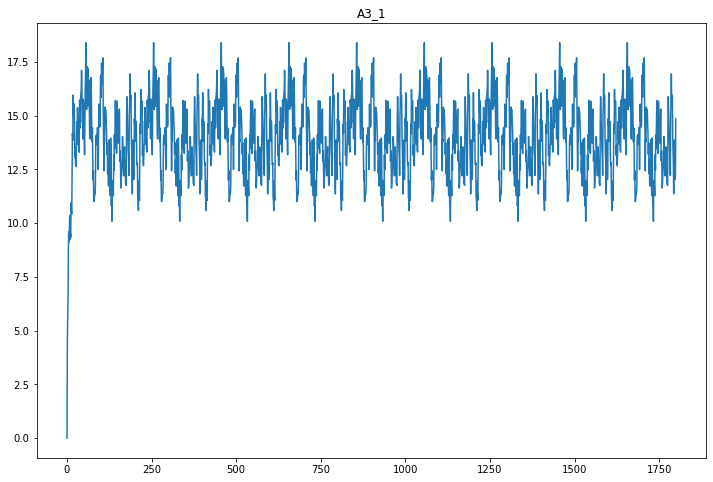

In [18]:
nn_r.plot_A()



### In Relu in final output A3_1 is fluctuating

## Output Z of sigmoid

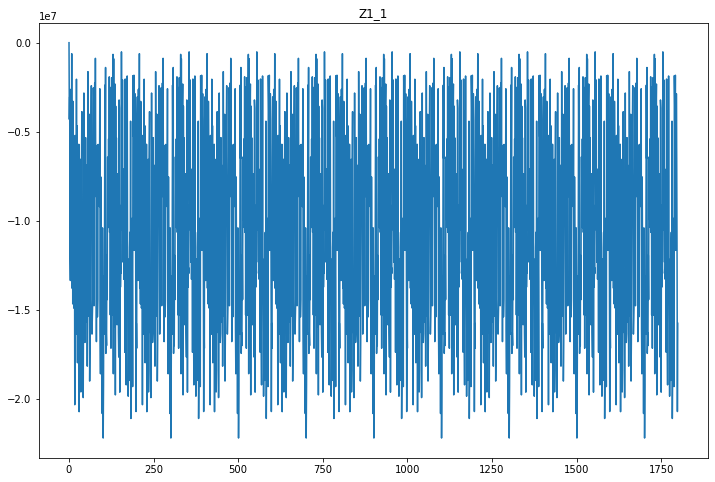

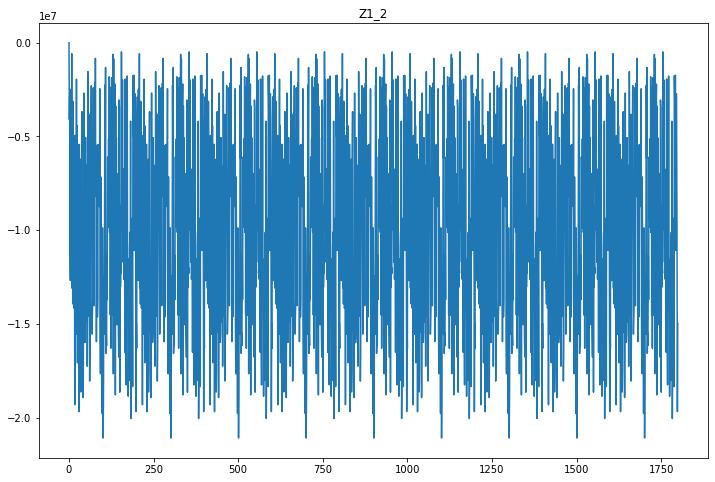

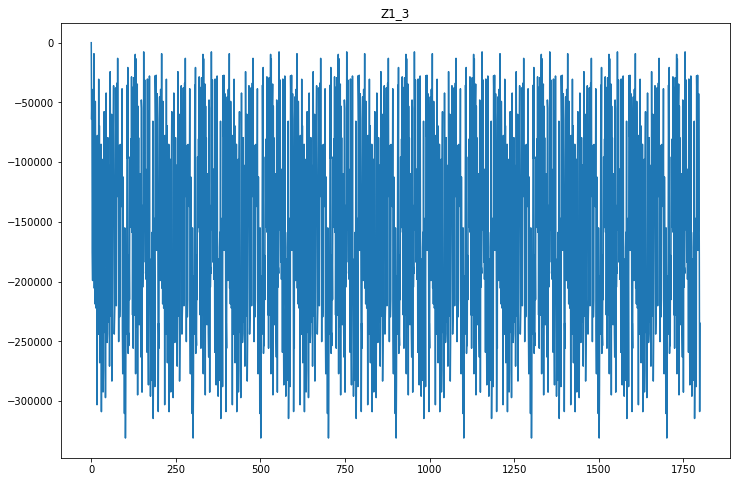

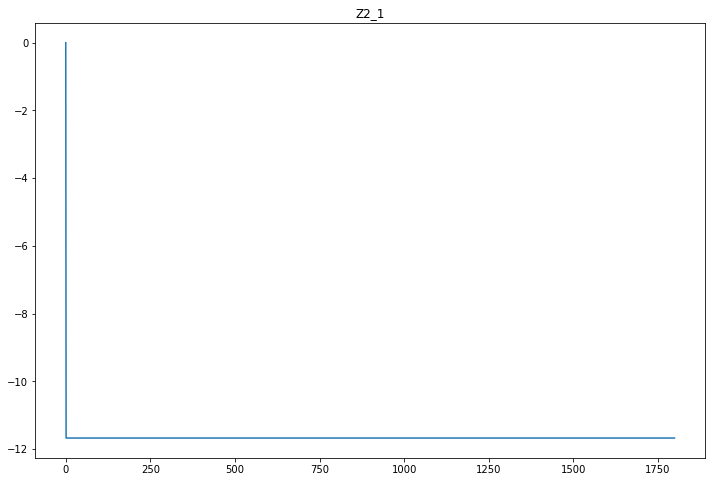

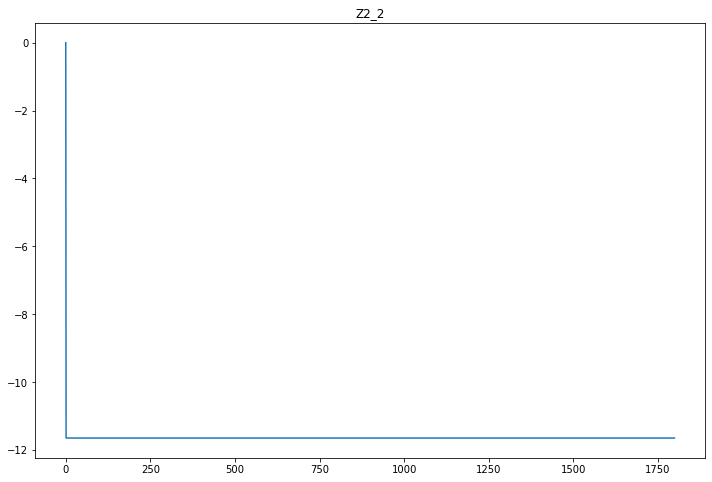

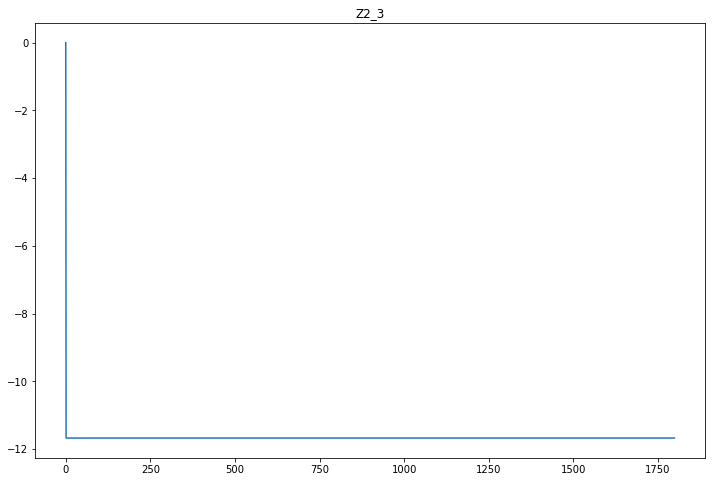

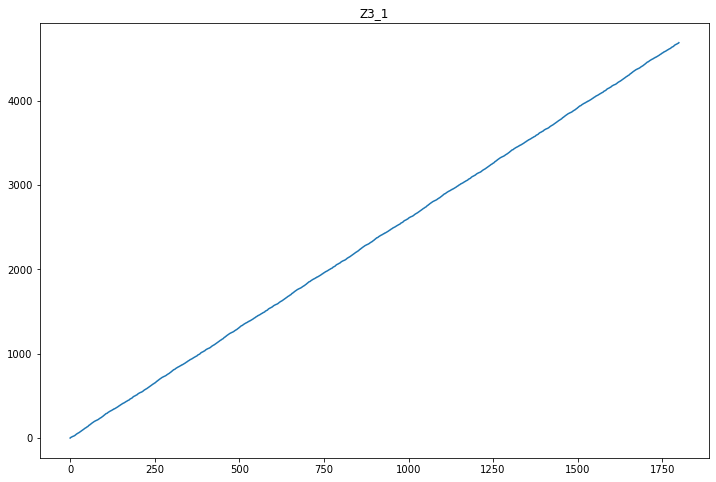

In [19]:
nn_s.plot_Z()

#### In sigmoid the 1st layer neurons output Z is distorted and layers 3 neuron output is smooth

## Output Z of Relu

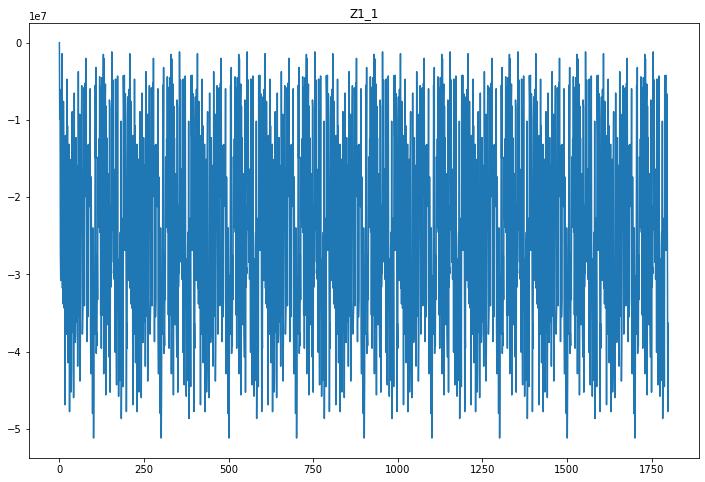

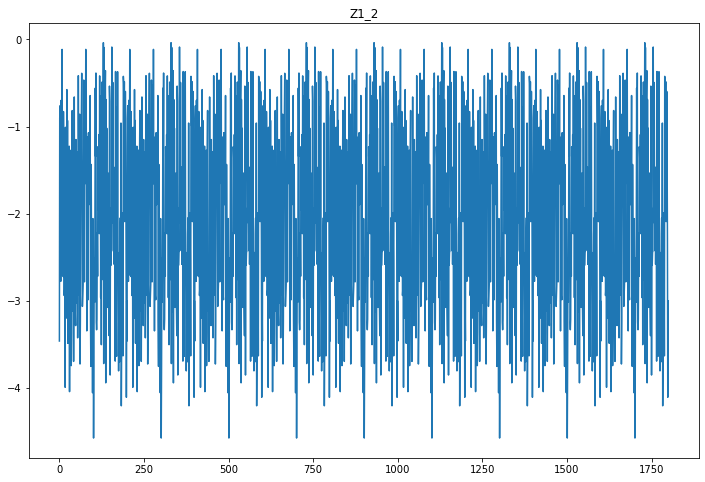

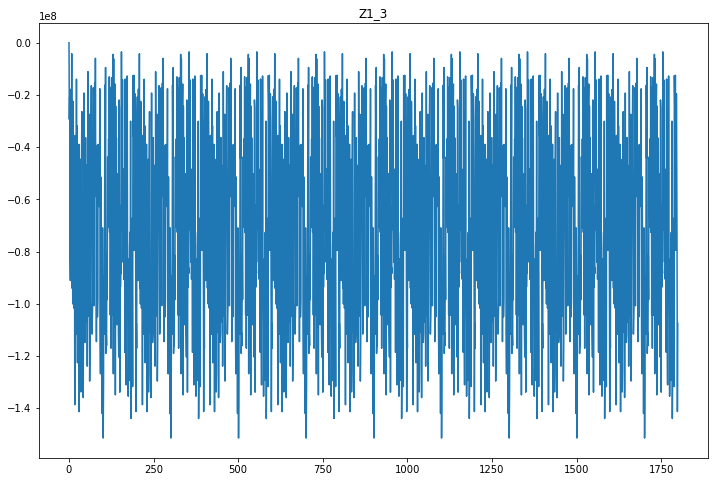

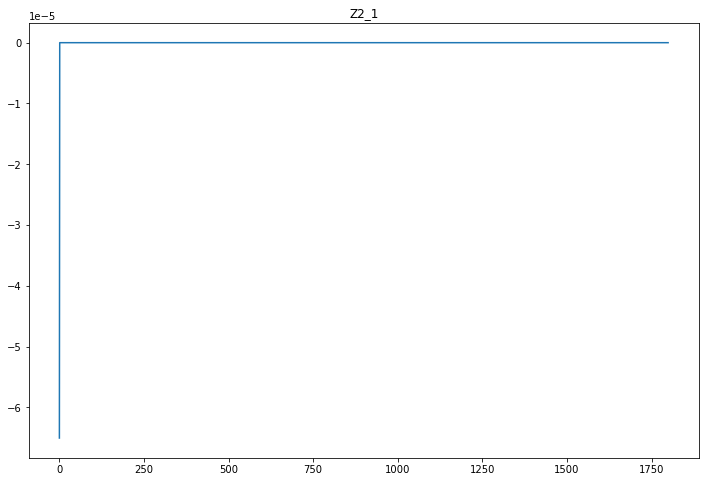

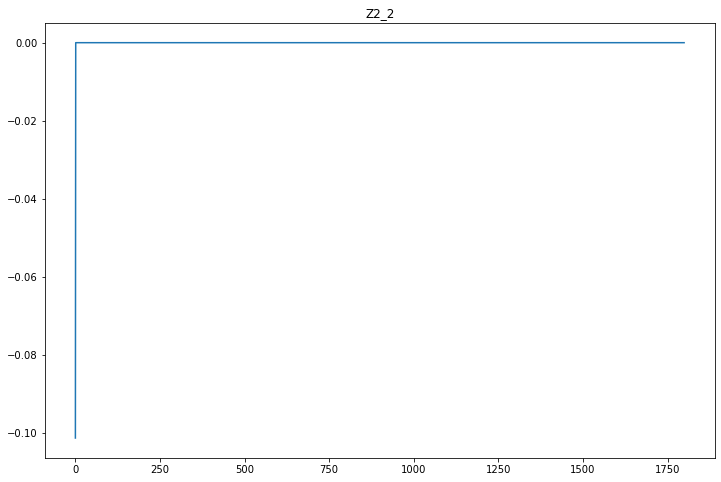

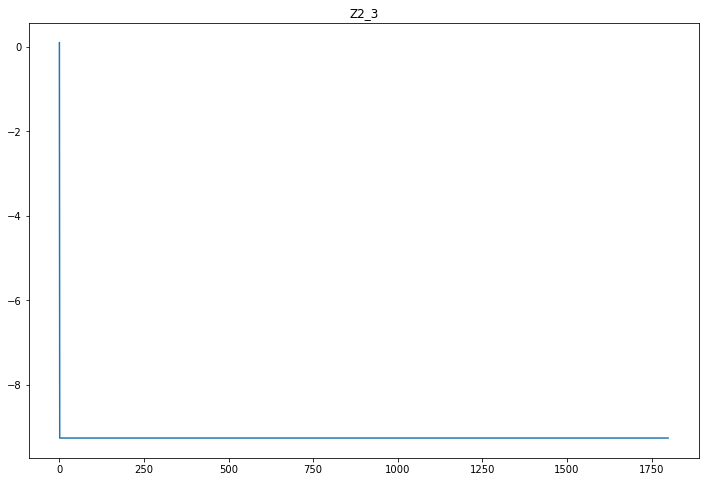

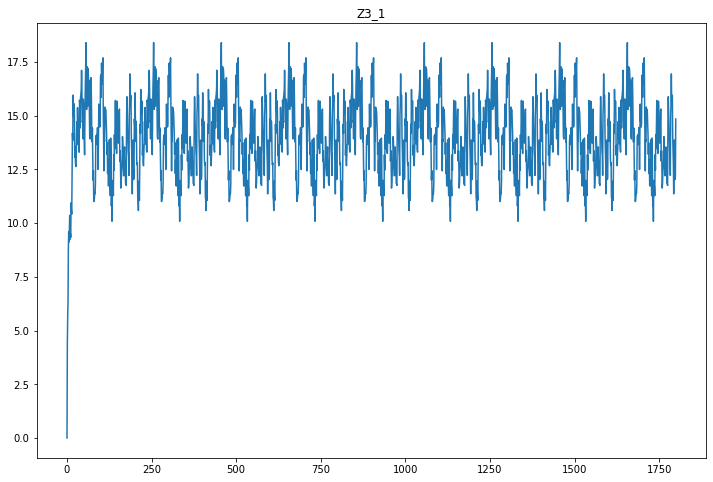

In [20]:
nn_r.plot_Z()

#### Similiarly for relu first layer Z outputs are distorting

## derivative dZ of sigmoid

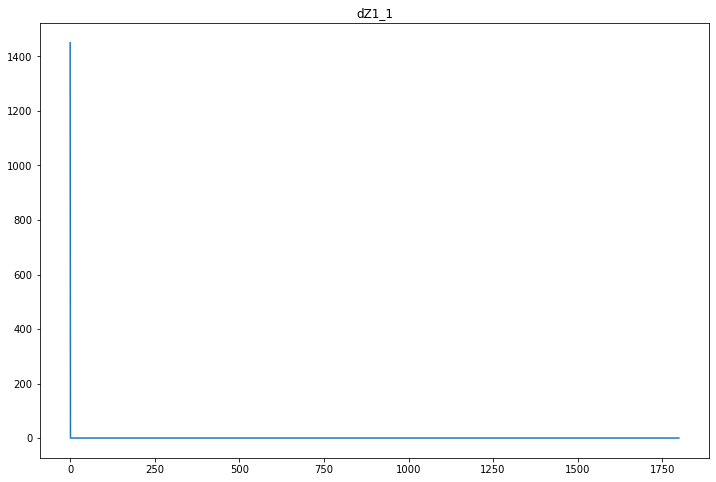

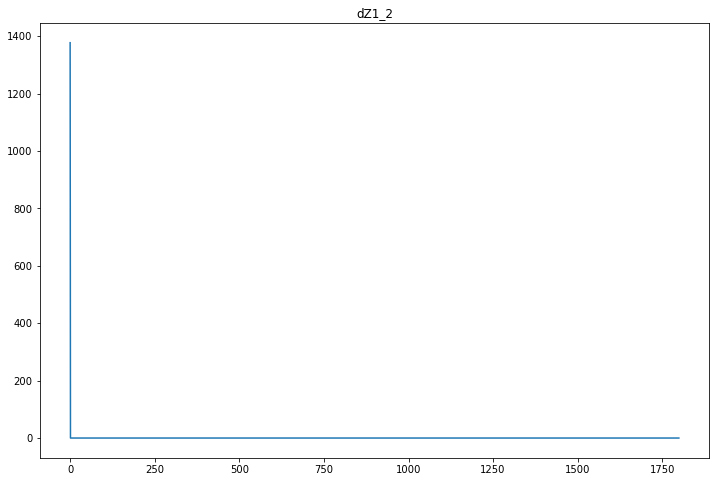

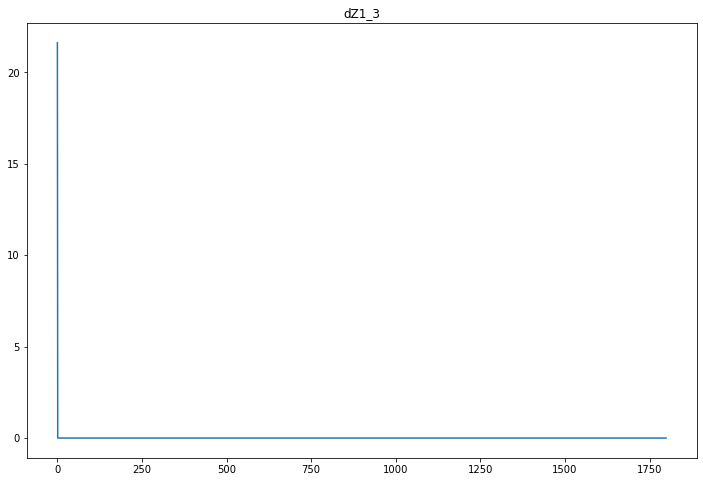

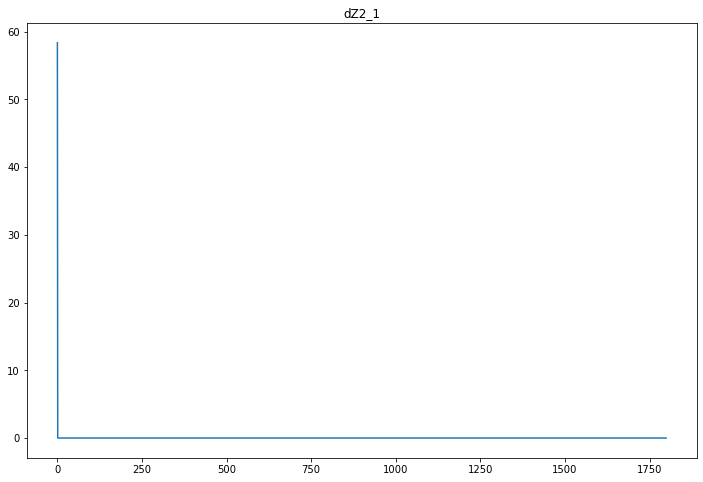

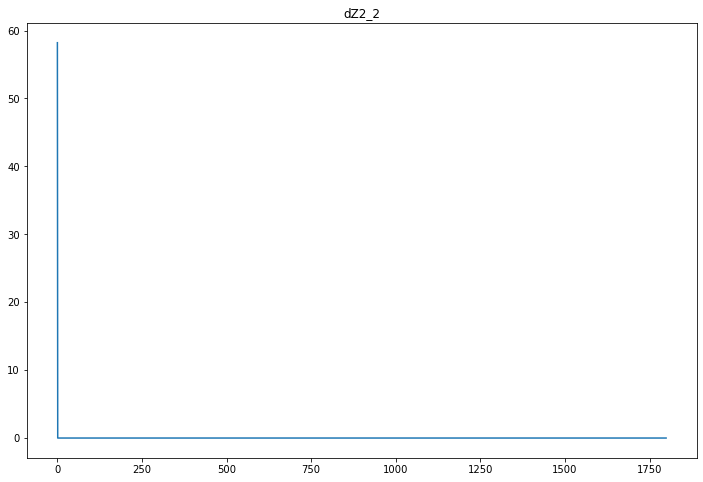

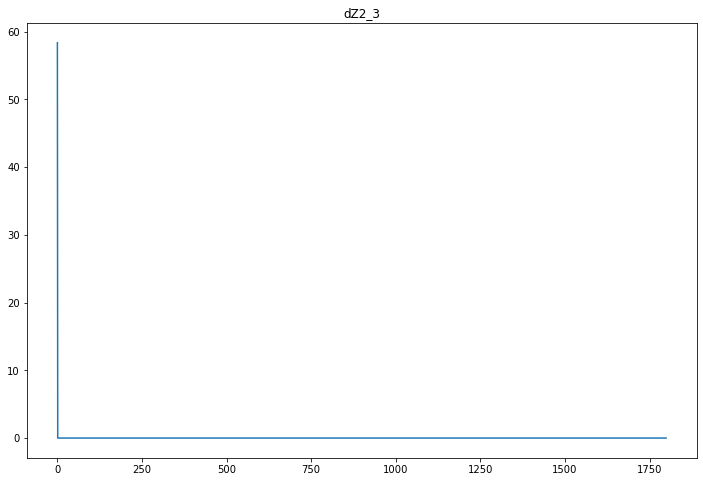

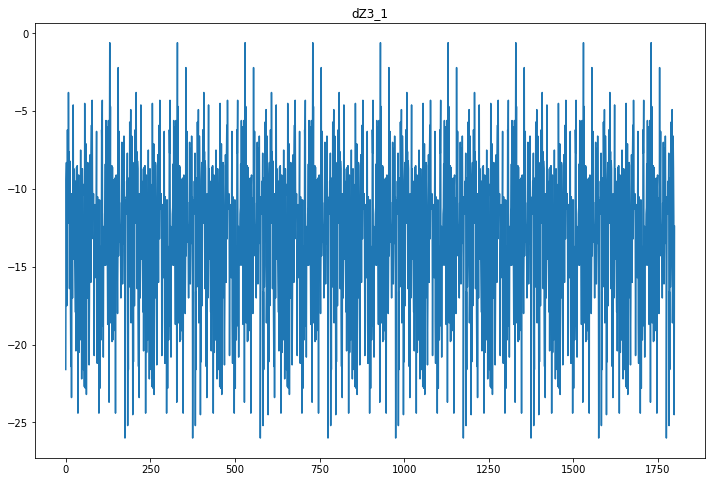

In [21]:
nn_s.plot_dZ()

#### In sigmoid dZ of final layer is fluctuating

## derivative dZ of Relu

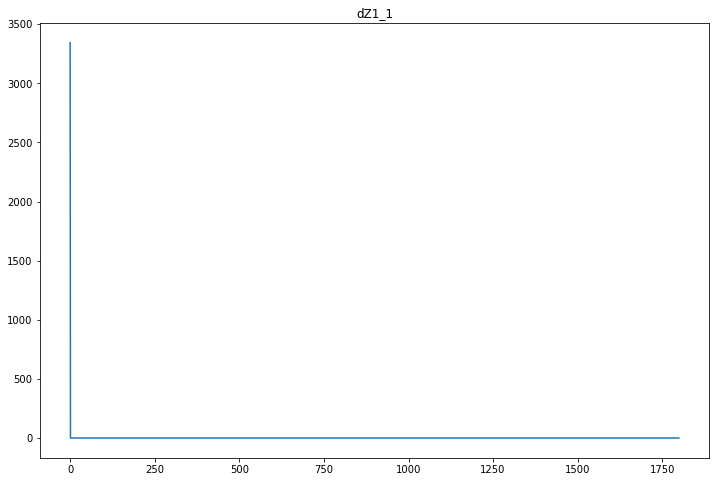

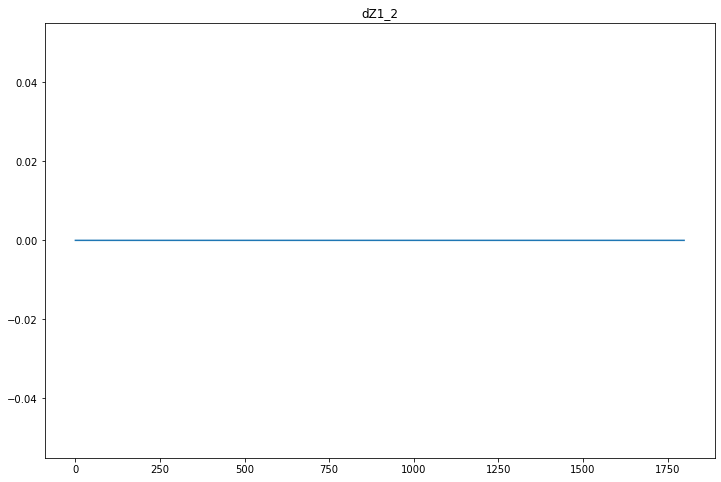

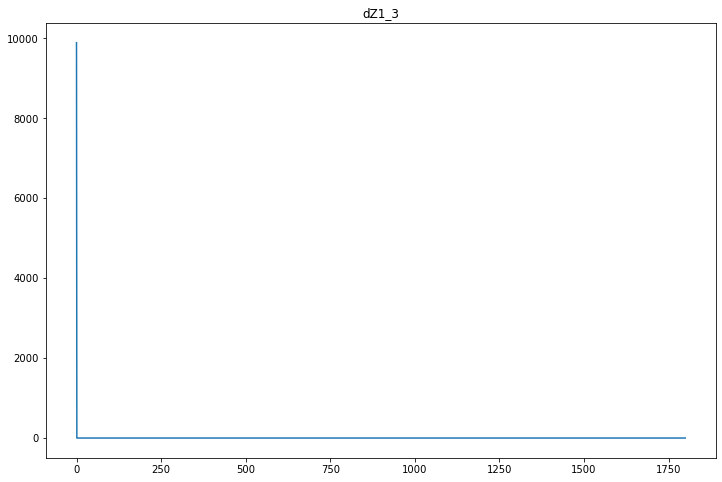

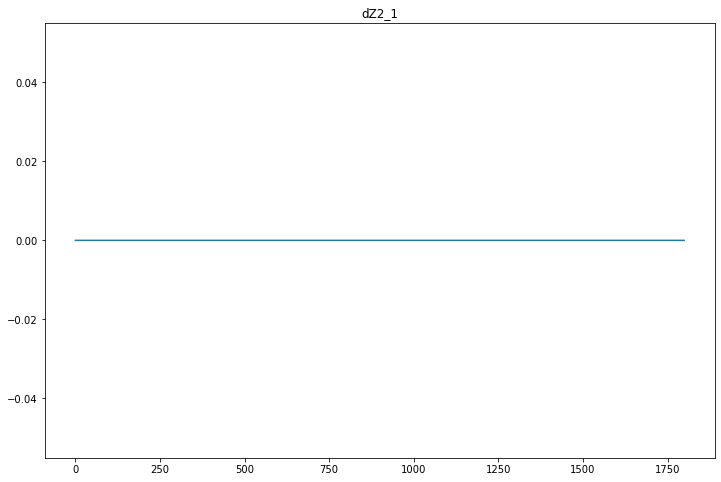

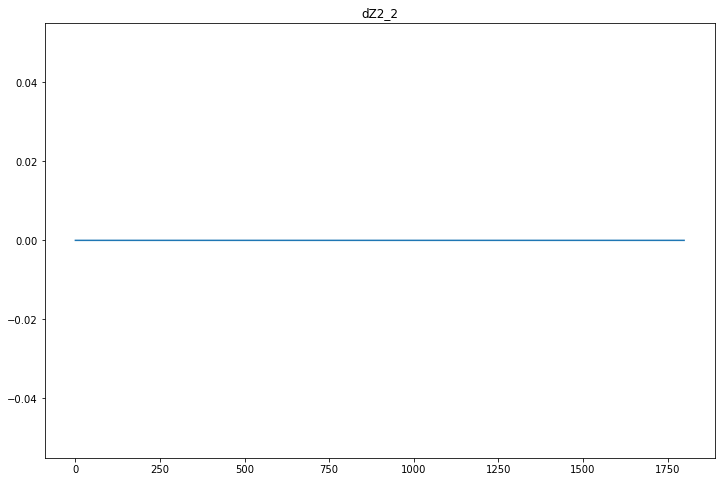

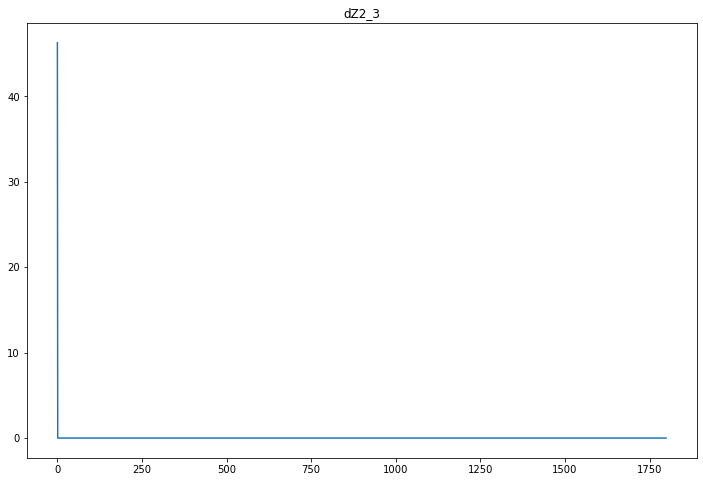

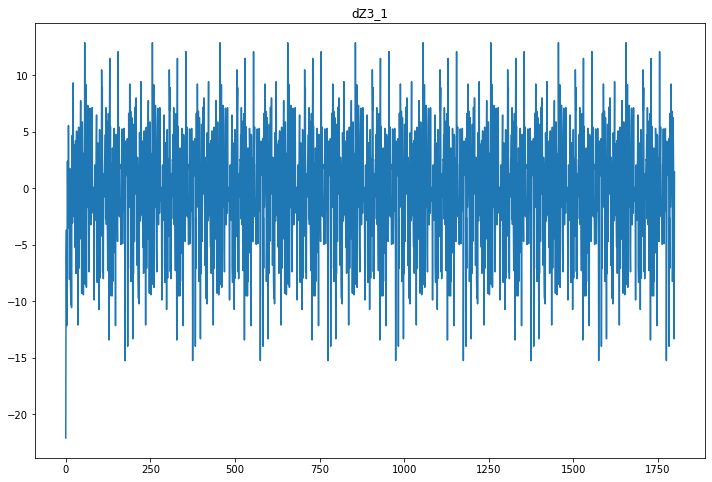

In [22]:
nn_r.plot_dZ()

#### In relu dZ of 3rd layer neuron is fluctuating

# Weights of sigmoid

<ipython-input-9-6ea268dd62e5>:406: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(12,8))


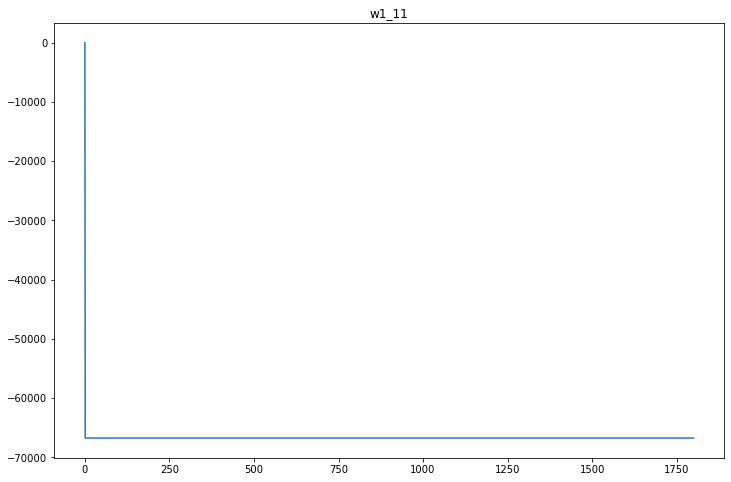

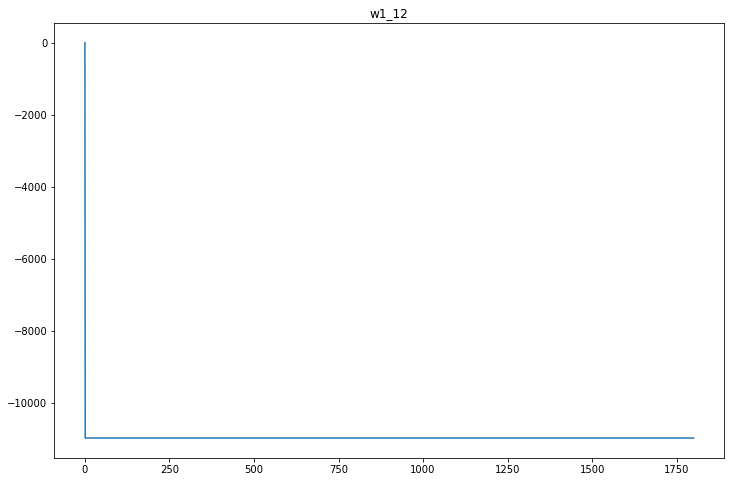

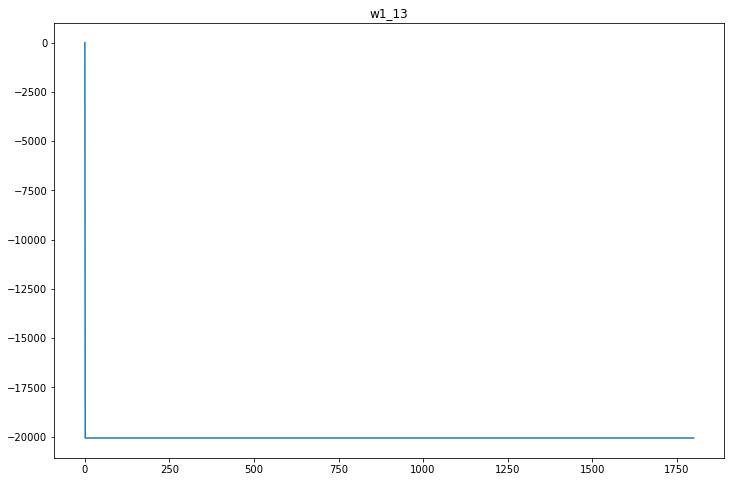

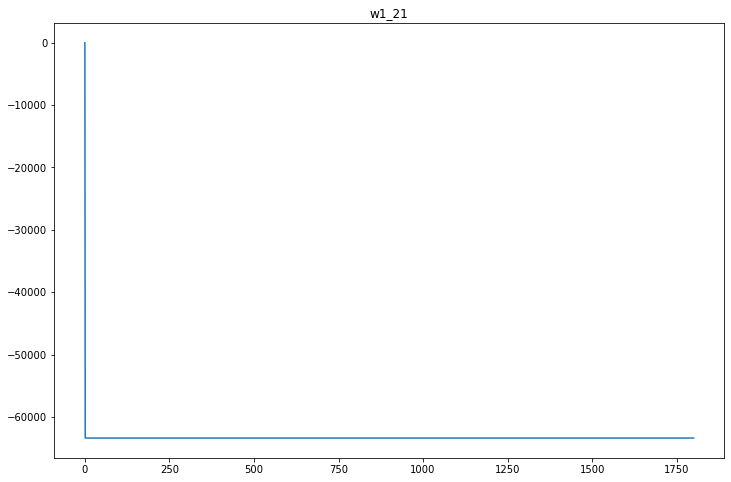

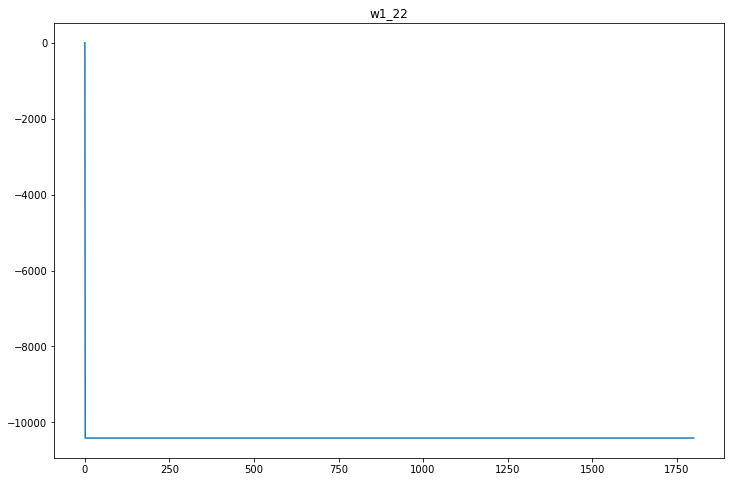

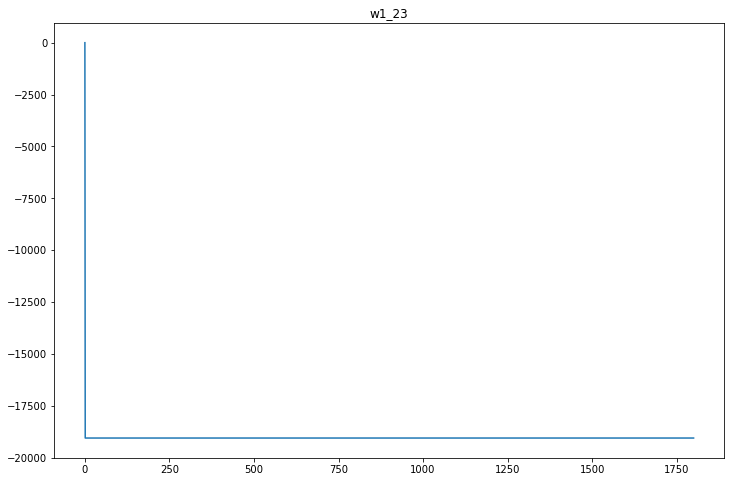

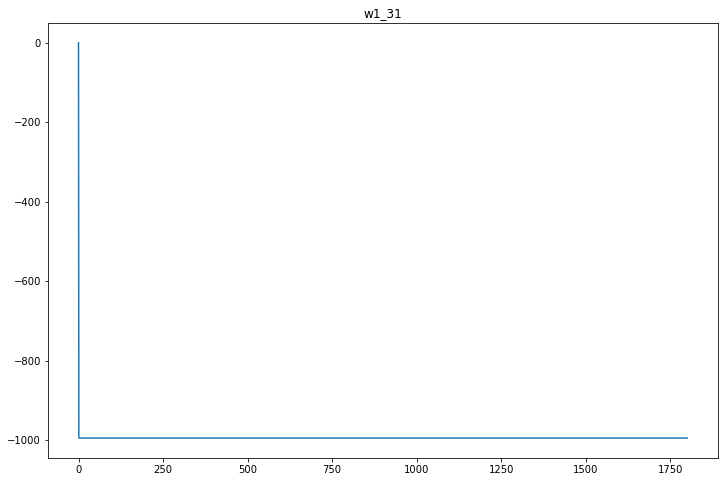

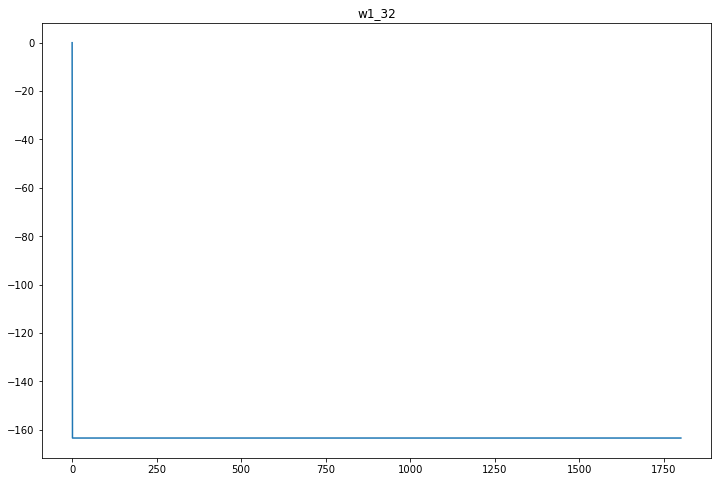

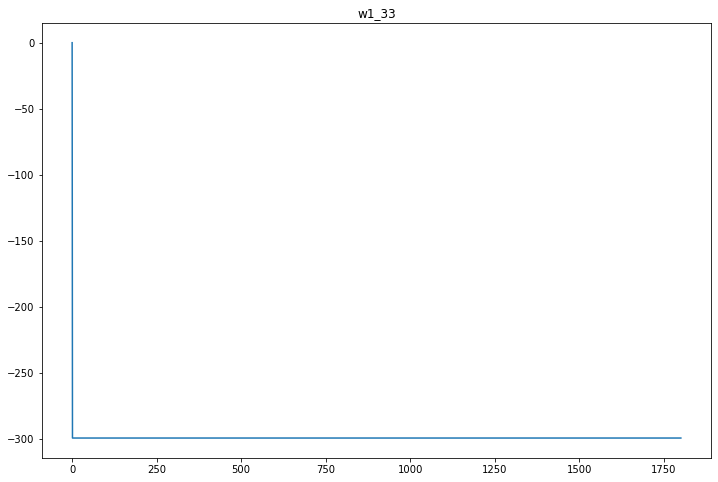

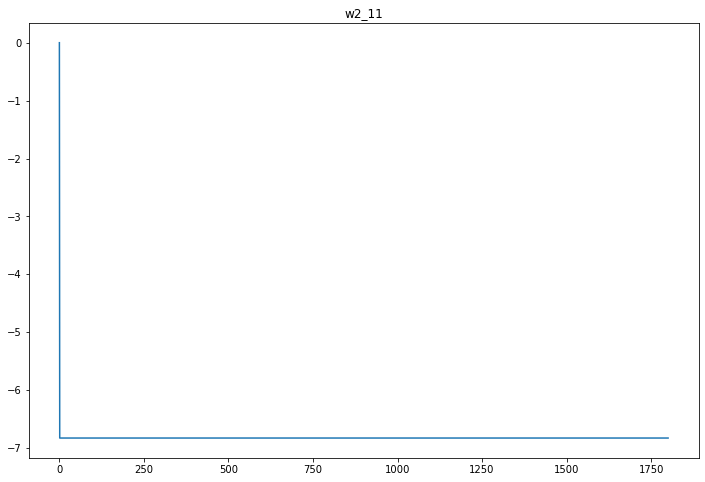

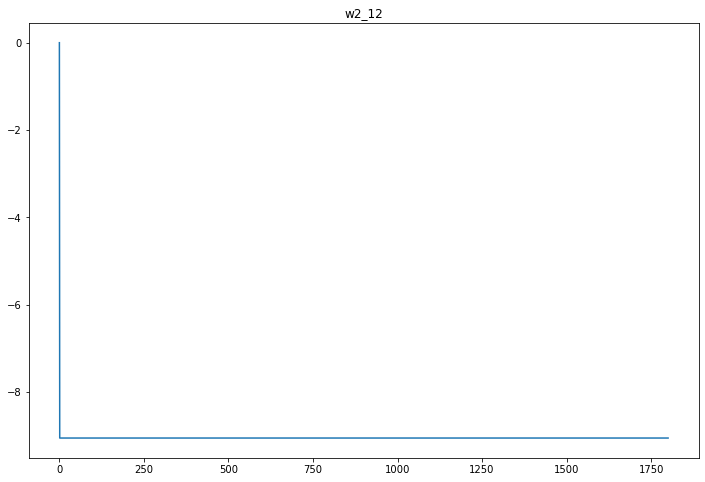

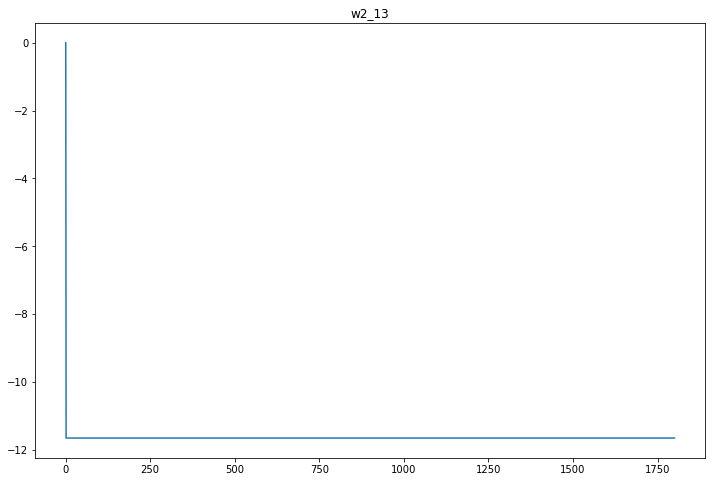

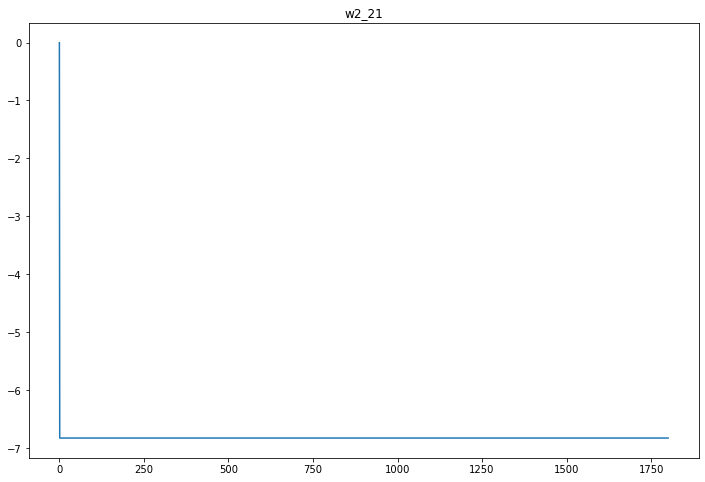

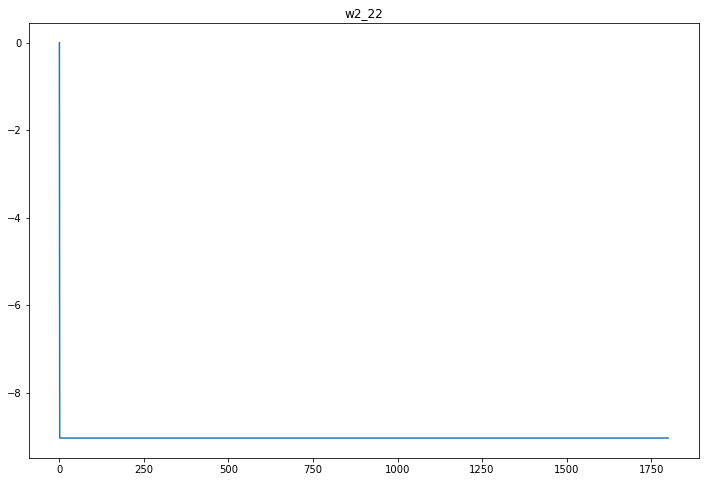

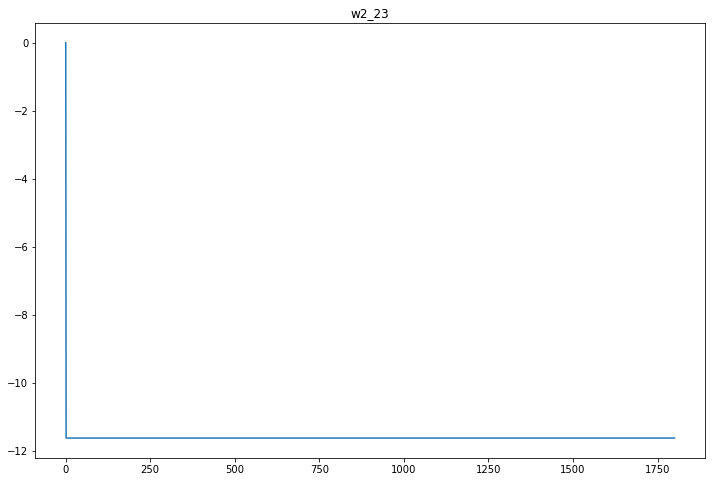

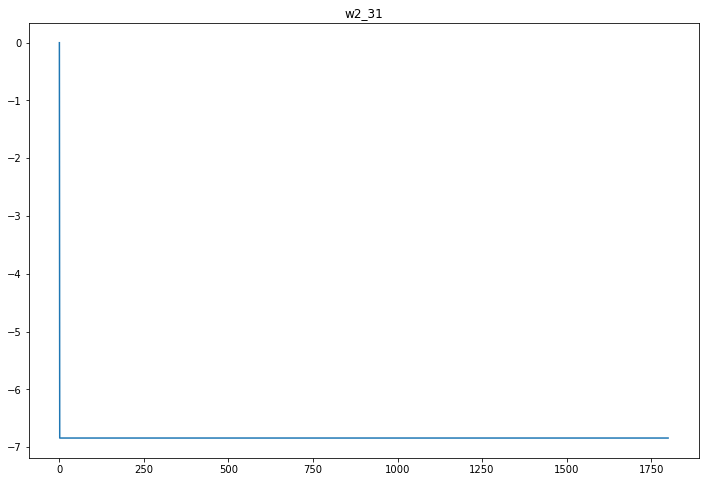

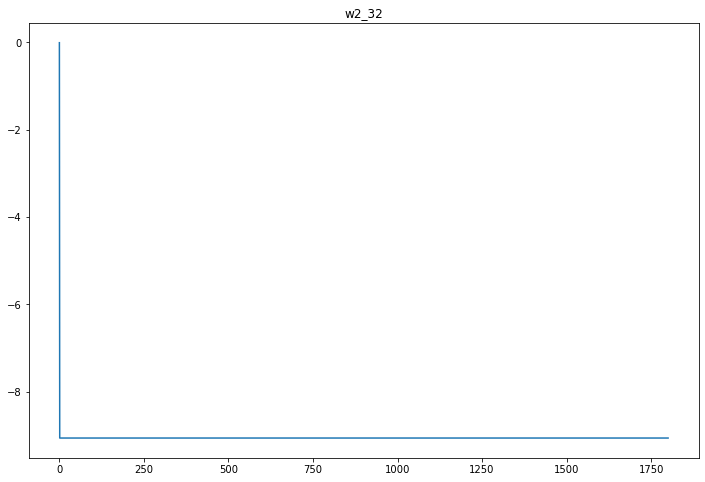

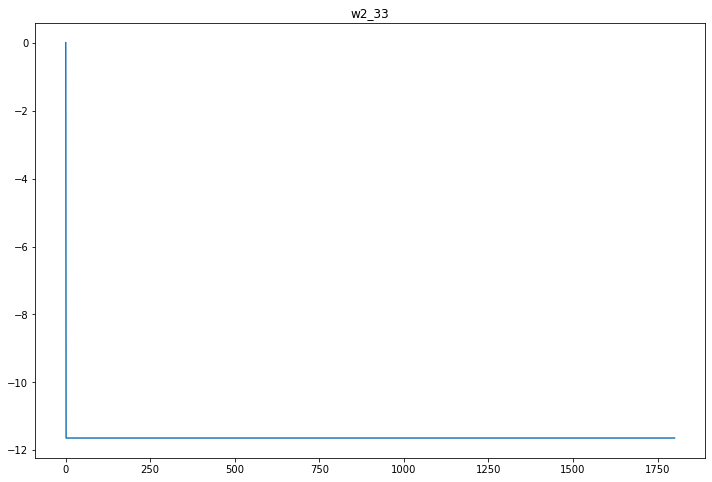

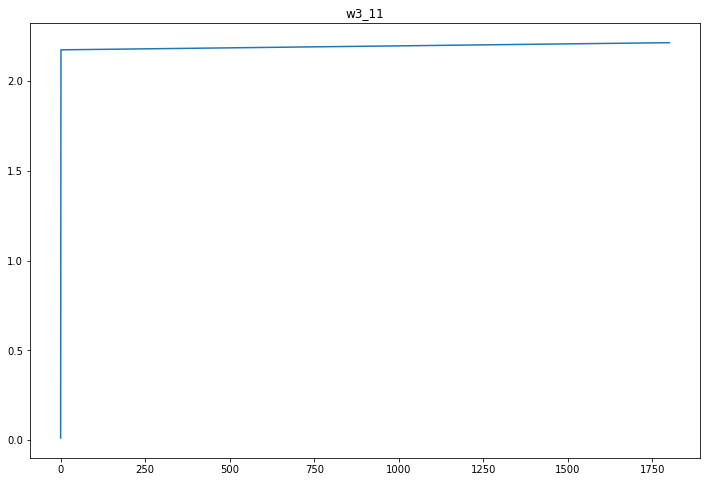

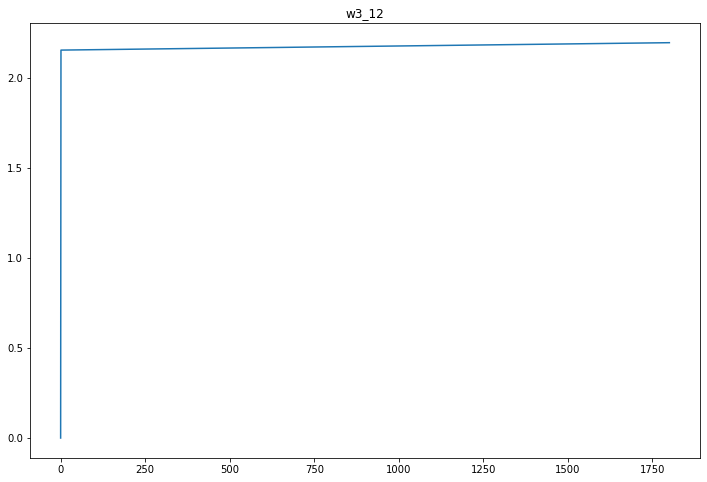

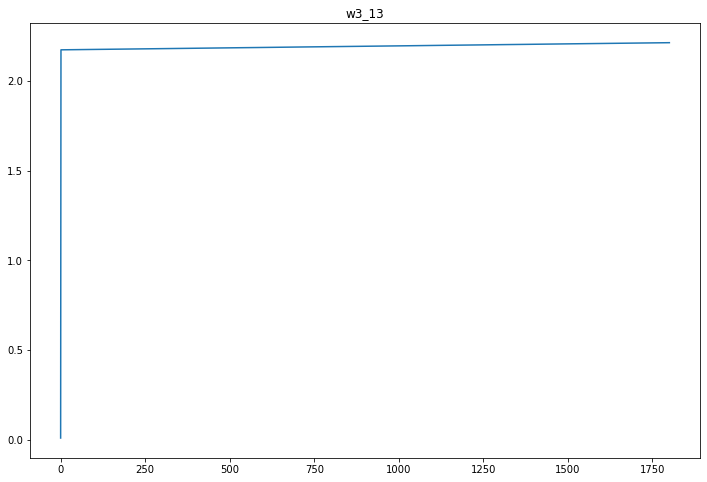

In [23]:
nn_s.plot_weights()

#### Weights of each neuron updated with sigmoid activation function

# Weights of relu

<ipython-input-9-6ea268dd62e5>:406: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(12,8))


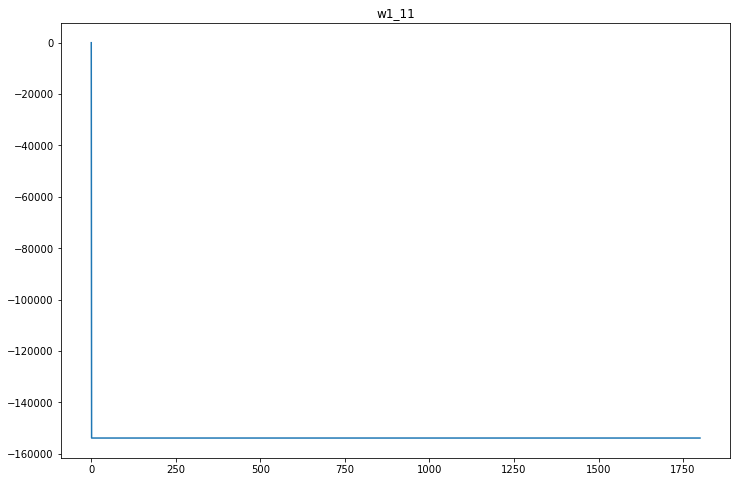

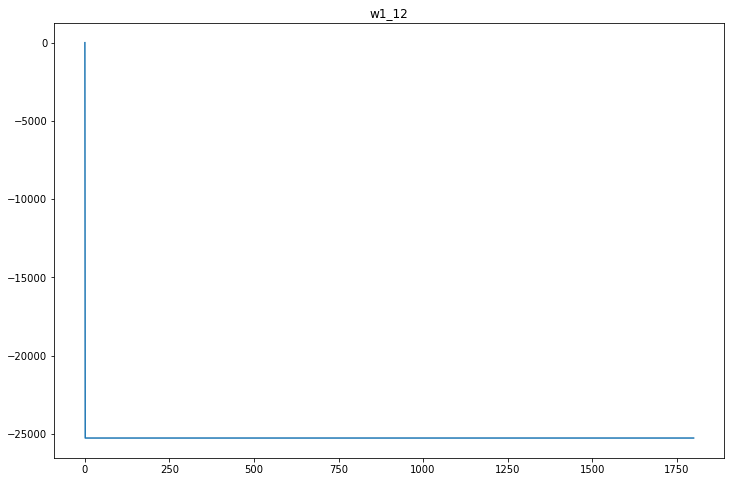

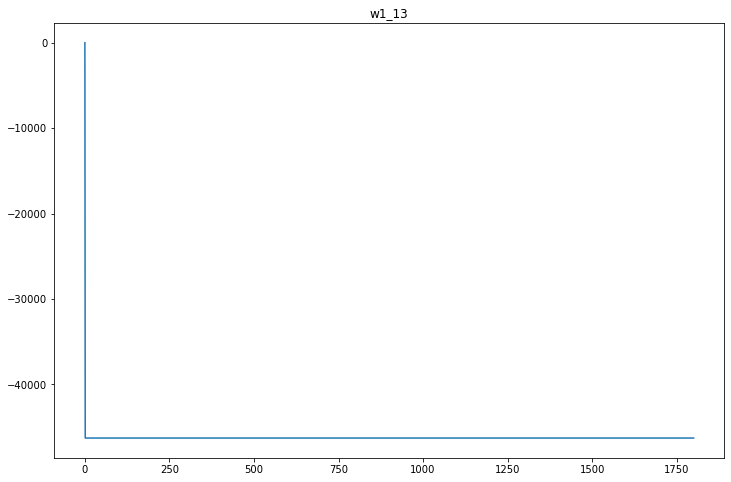

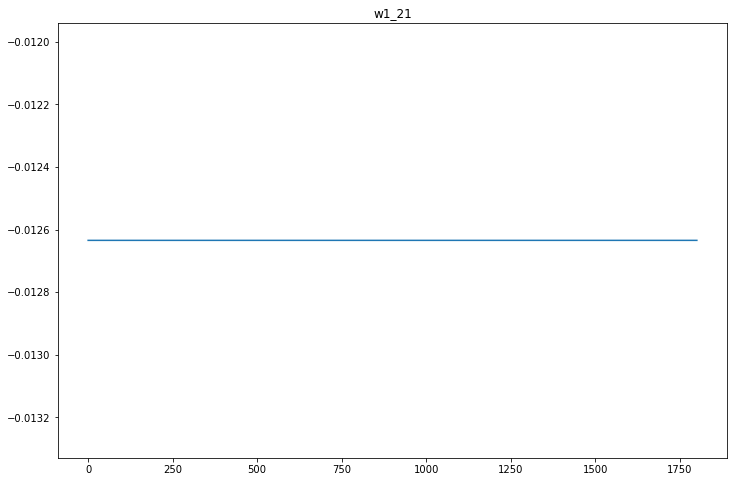

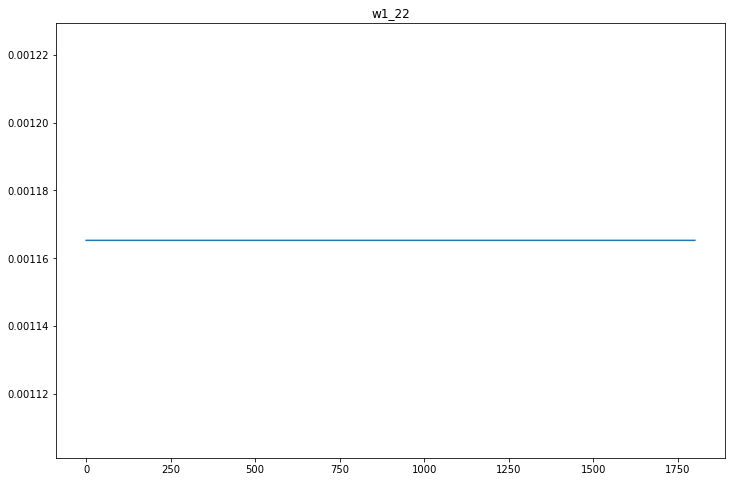

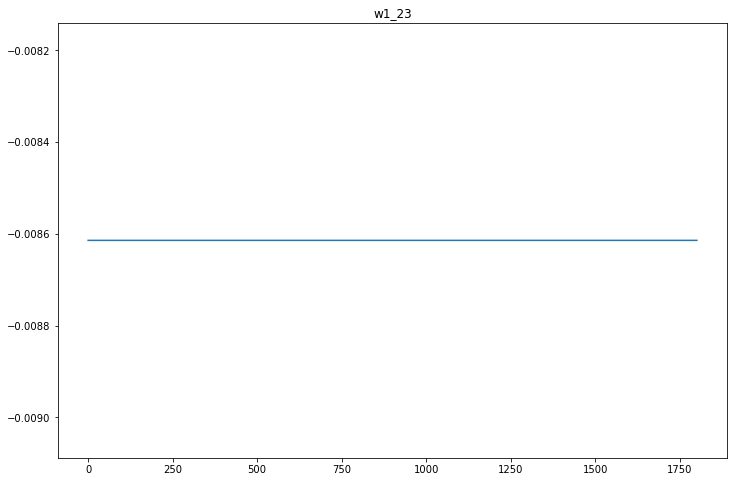

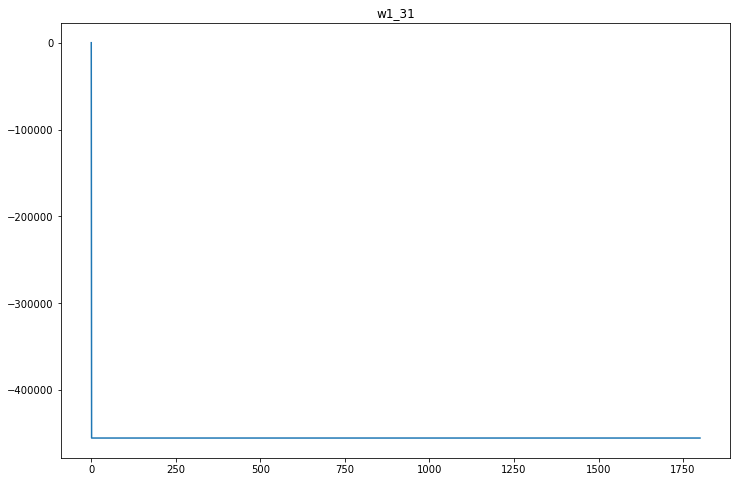

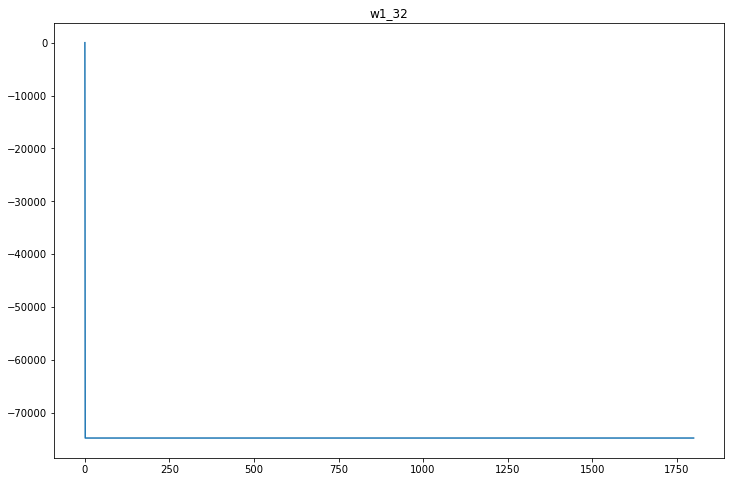

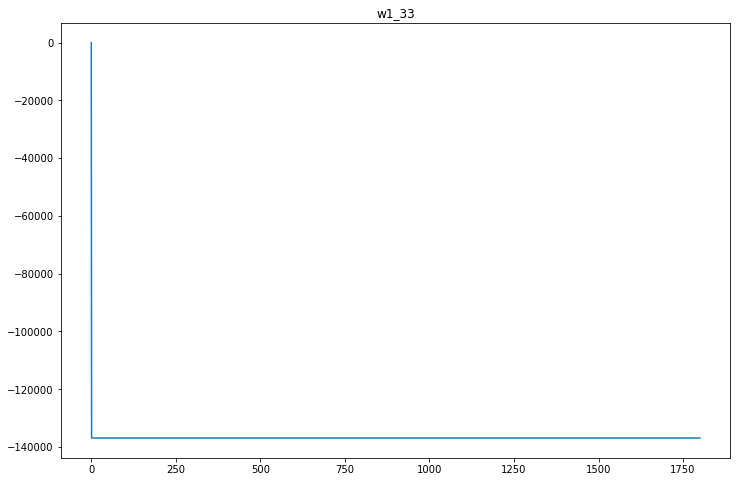

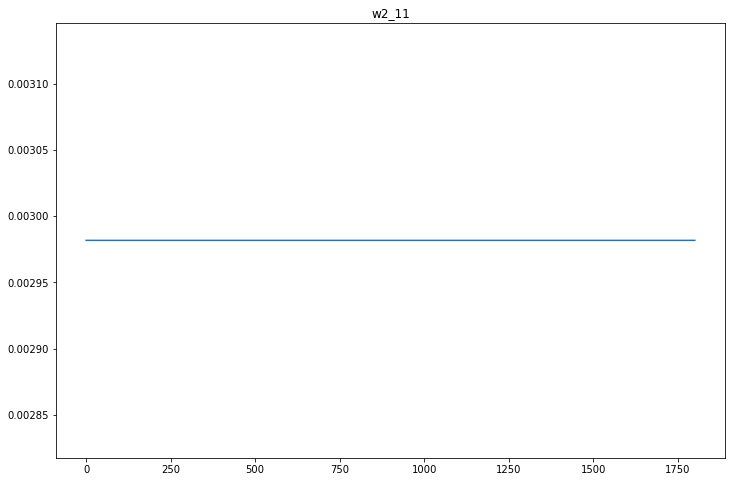

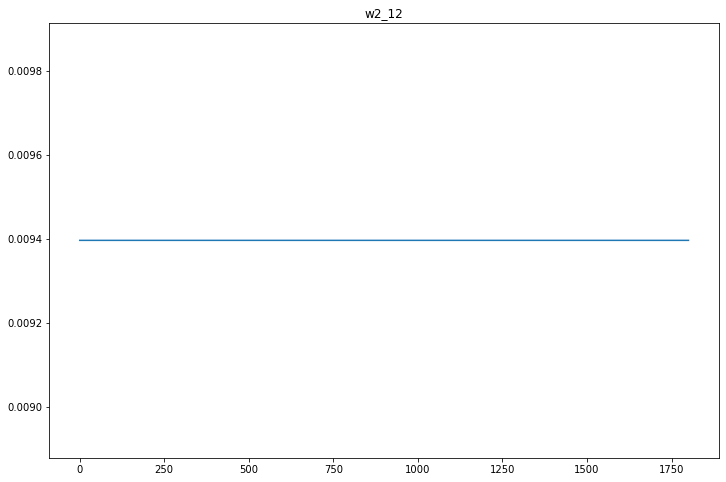

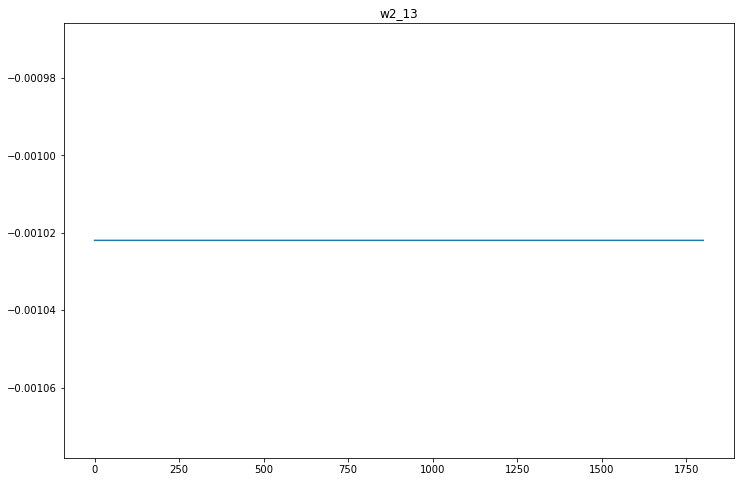

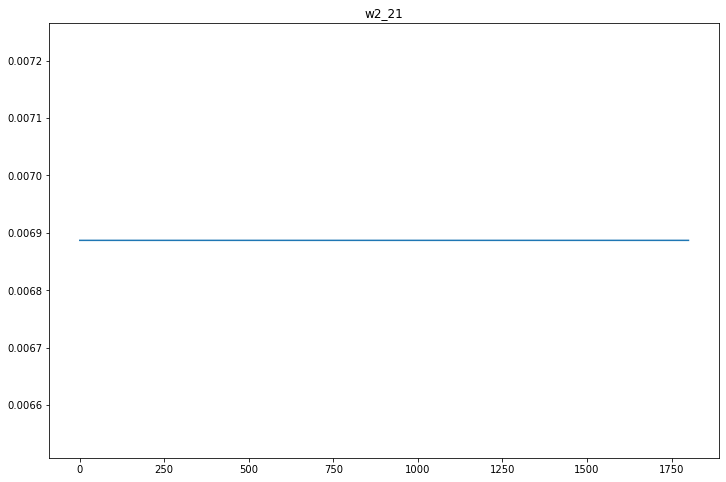

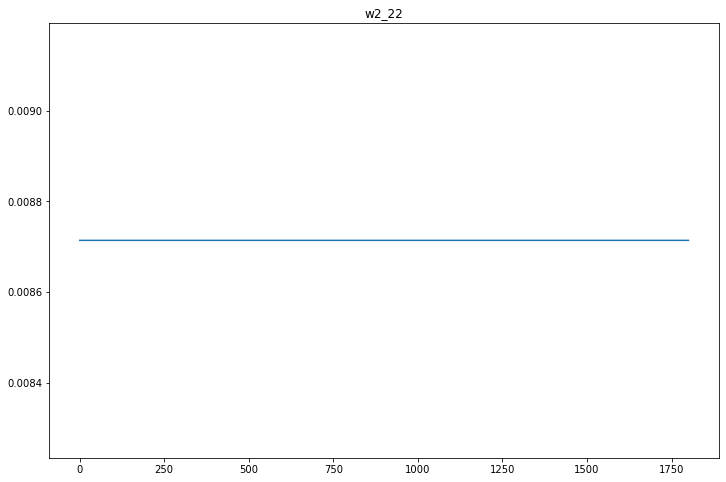

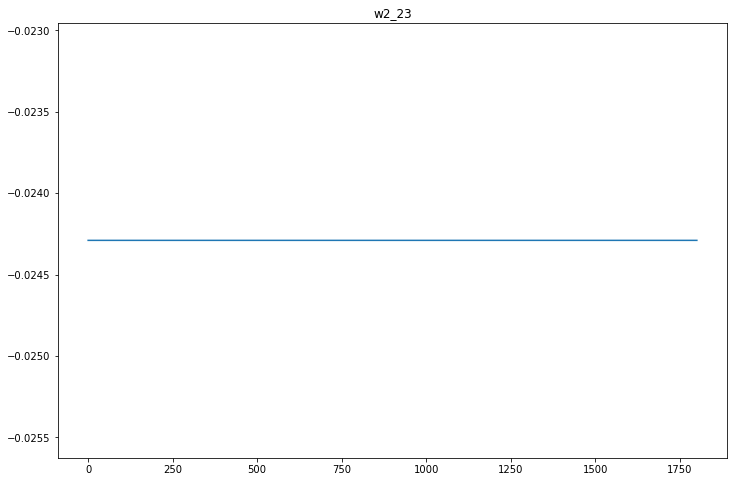

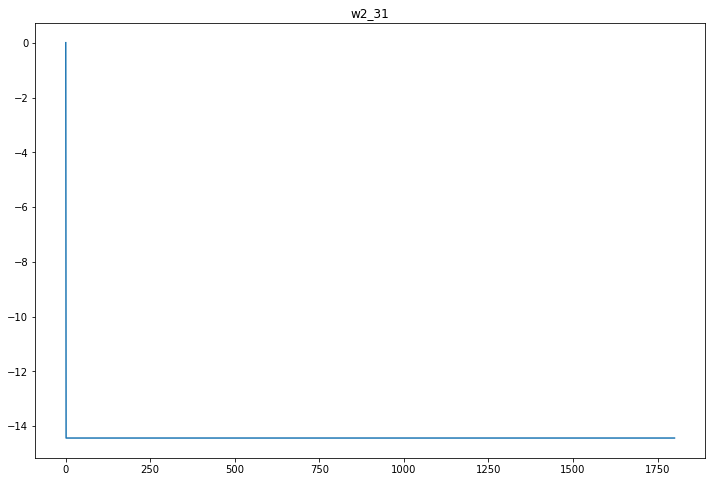

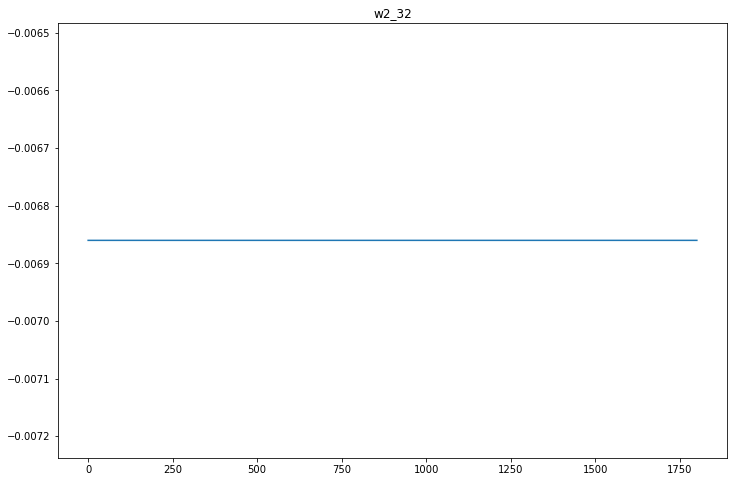

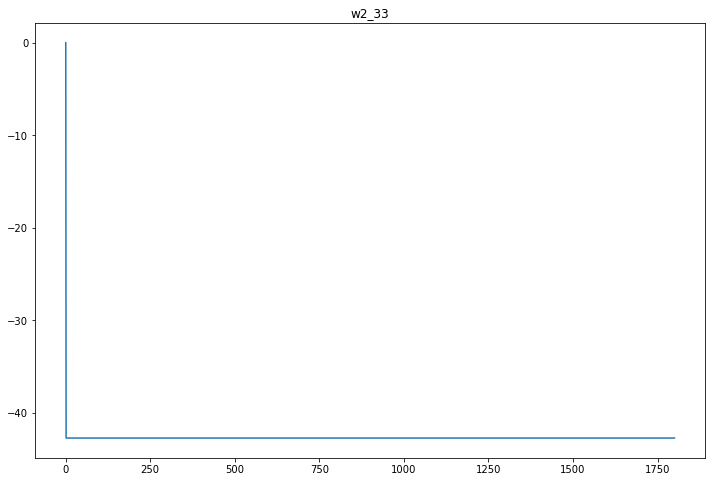

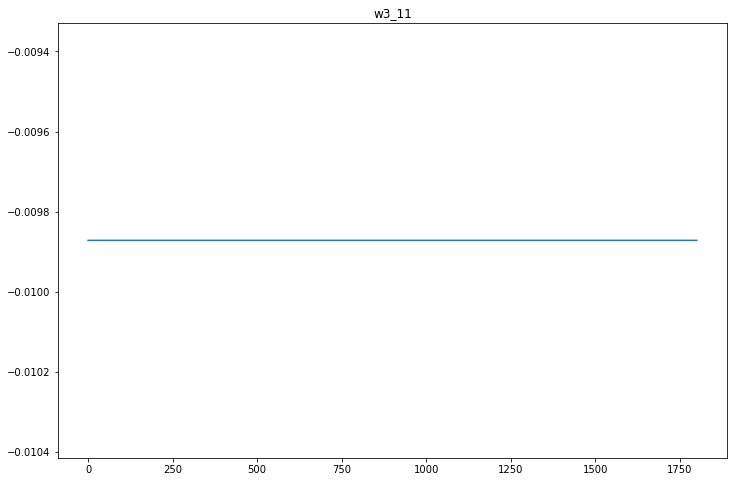

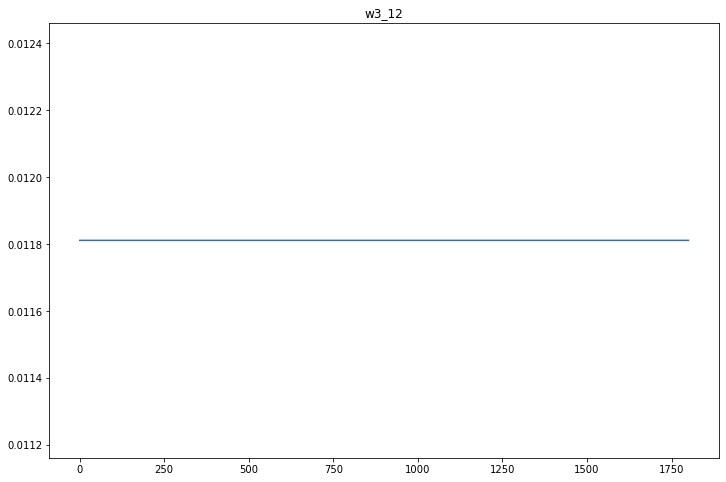

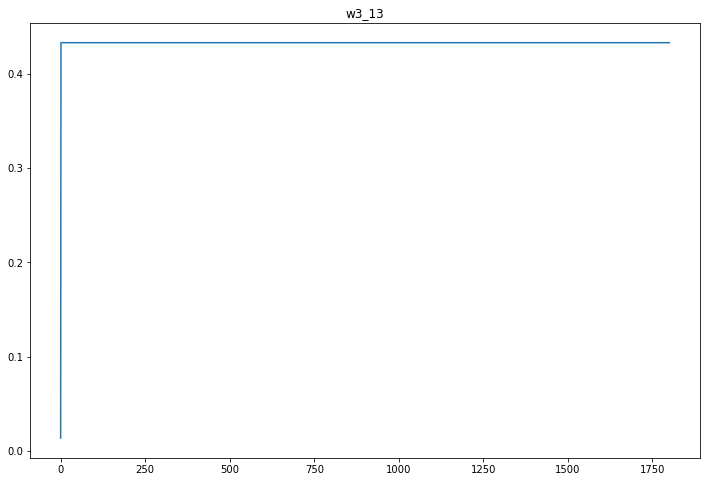

In [24]:
nn_r.plot_weights()

#### the weights with relu have been upgraded and response is smooth 

## Bias of sigmoid

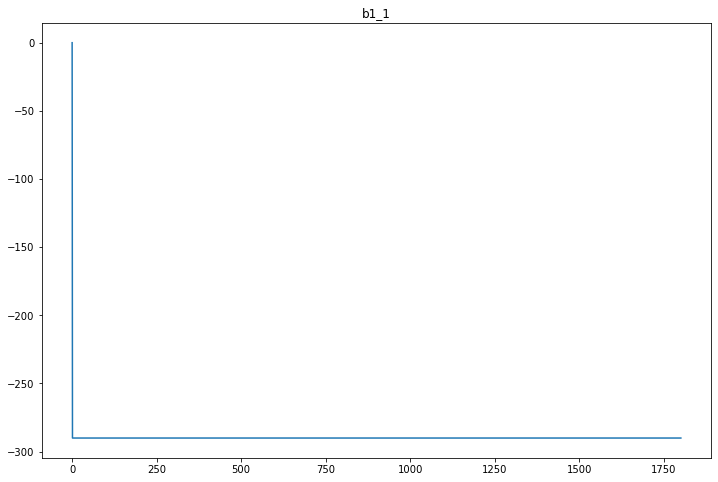

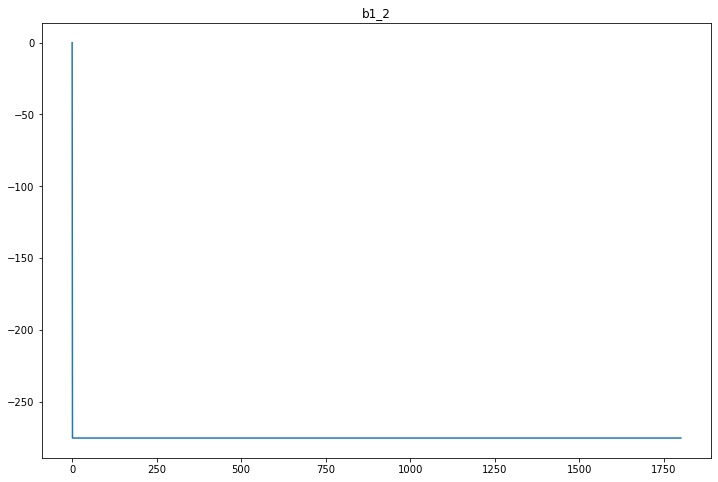

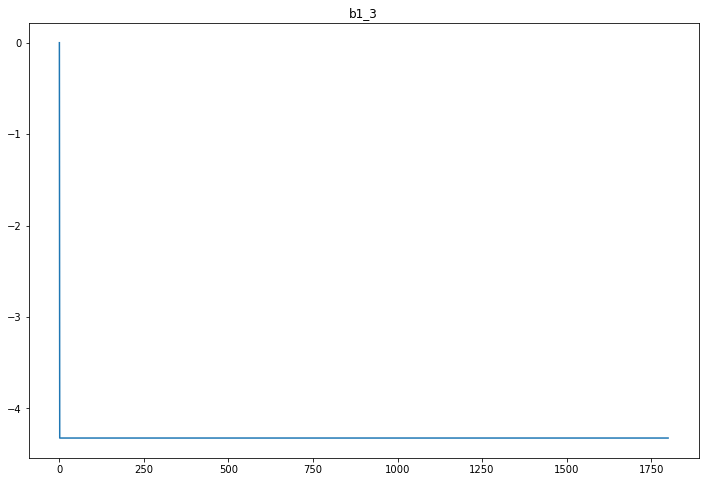

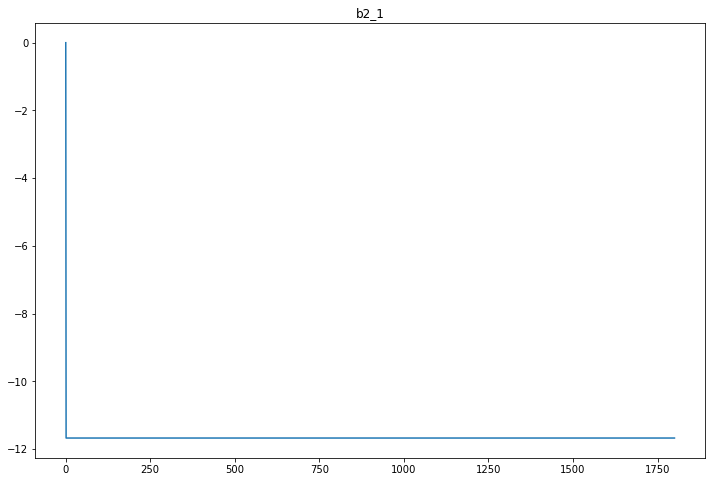

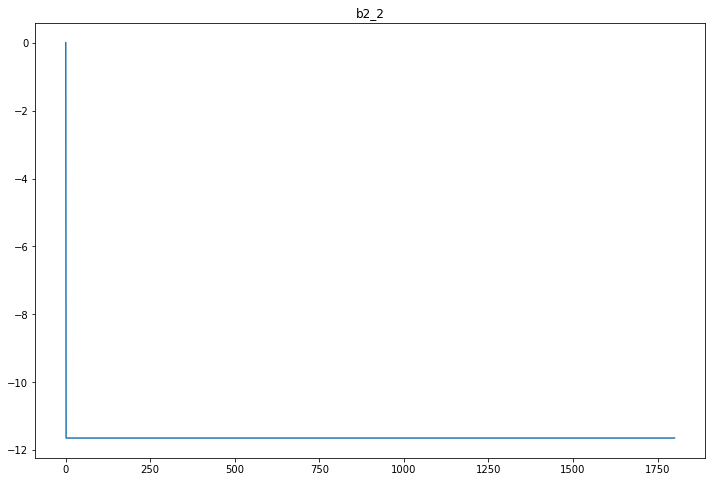

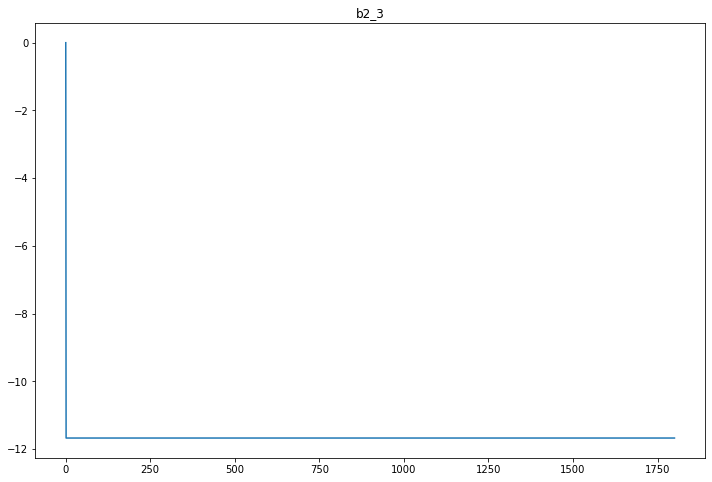

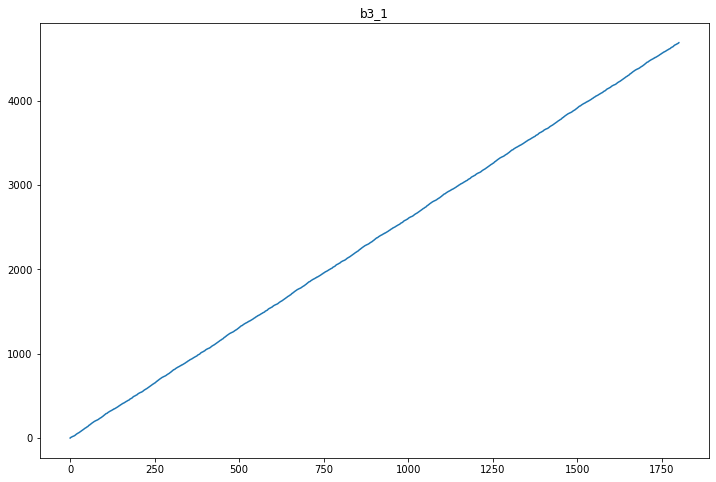

In [25]:
nn_s.plot_bias()

#### the bias reponse of last layer 3 has most significant impact

## Bias of relu

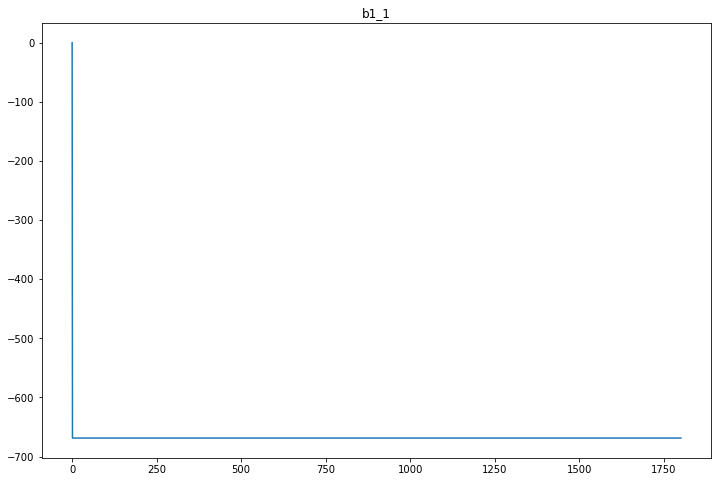

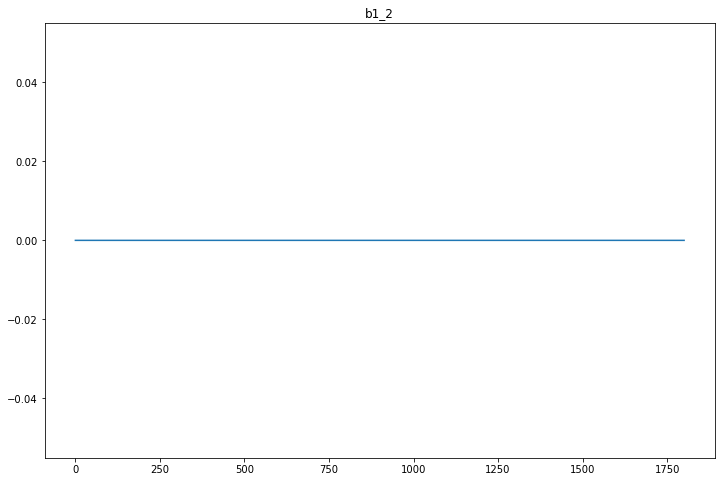

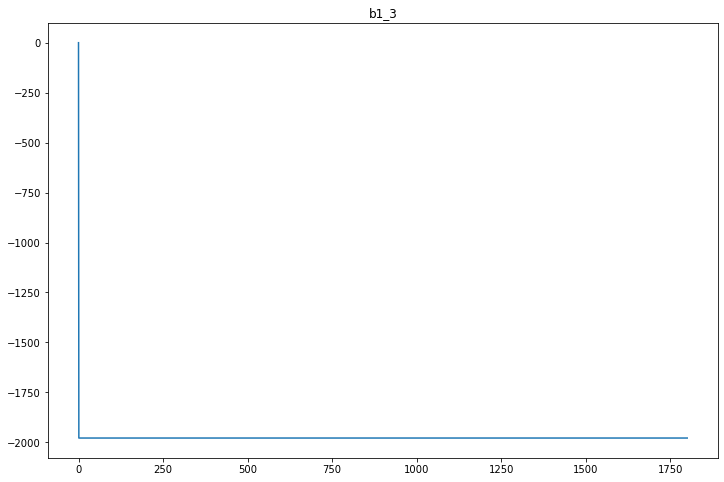

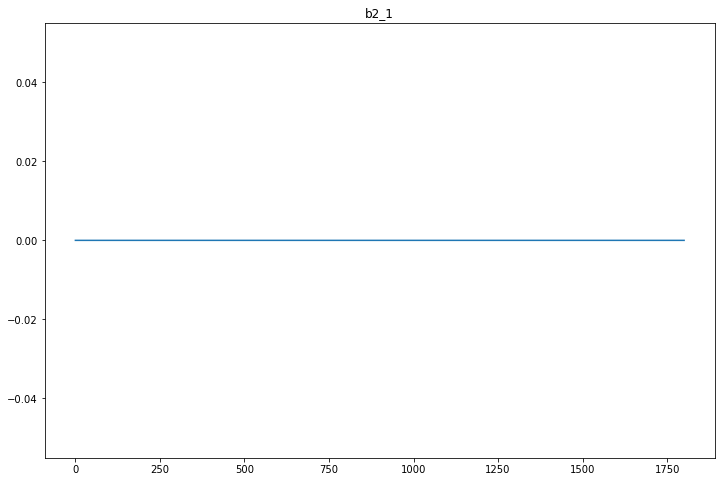

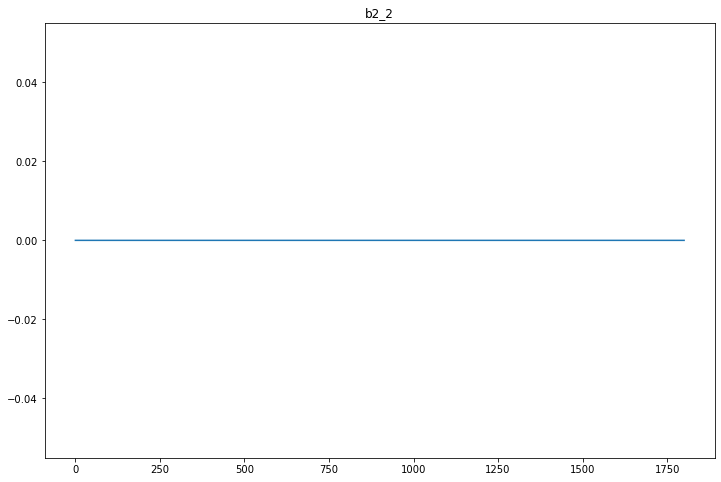

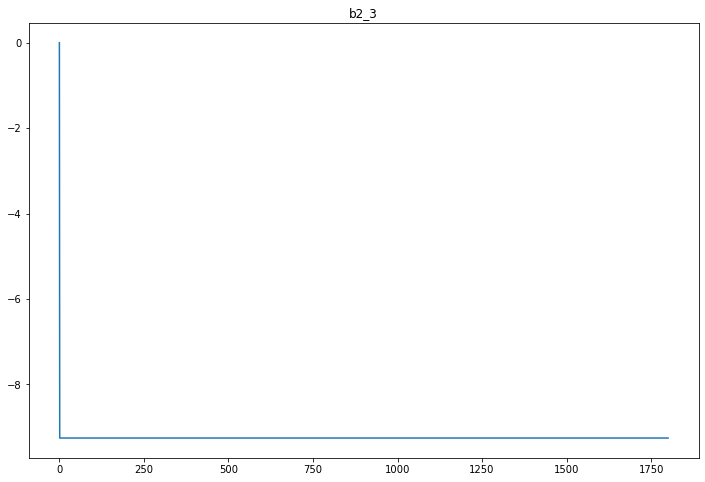

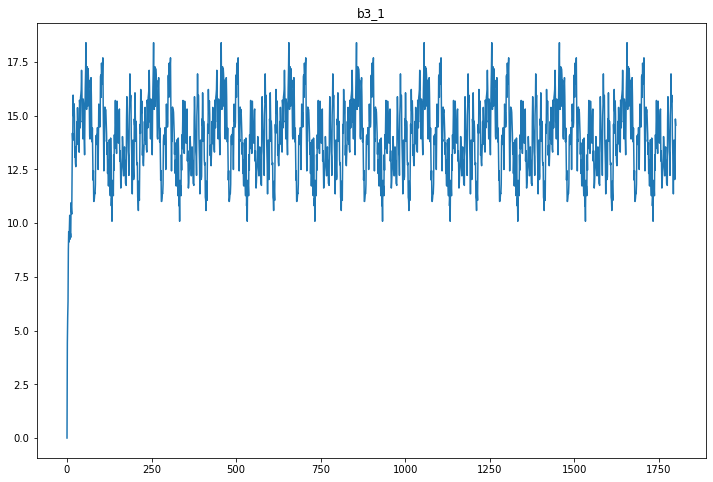

In [26]:
nn_r.plot_bias()

#### for sigmoid the bias response of layer 3 neuron is fluctuating

## DW  of sigmoid

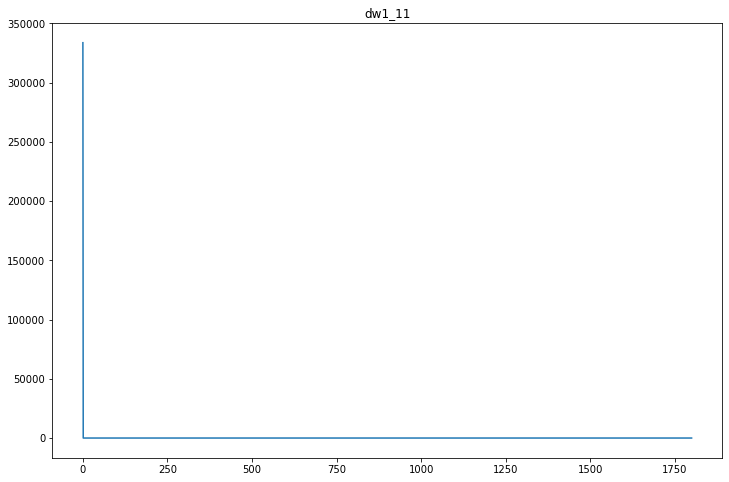

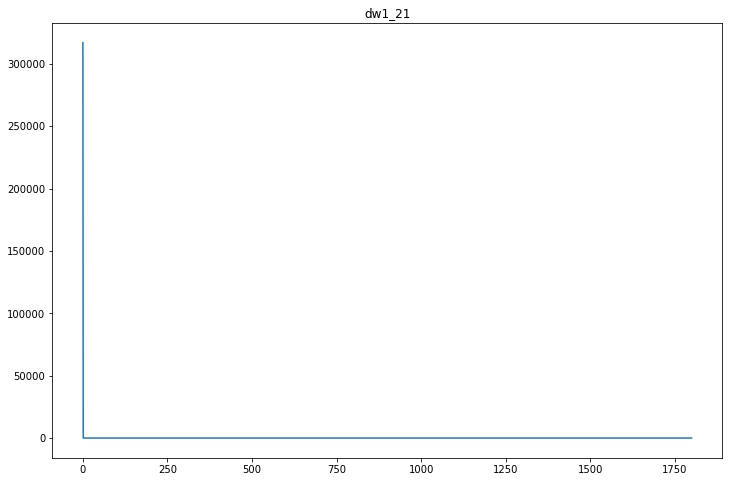

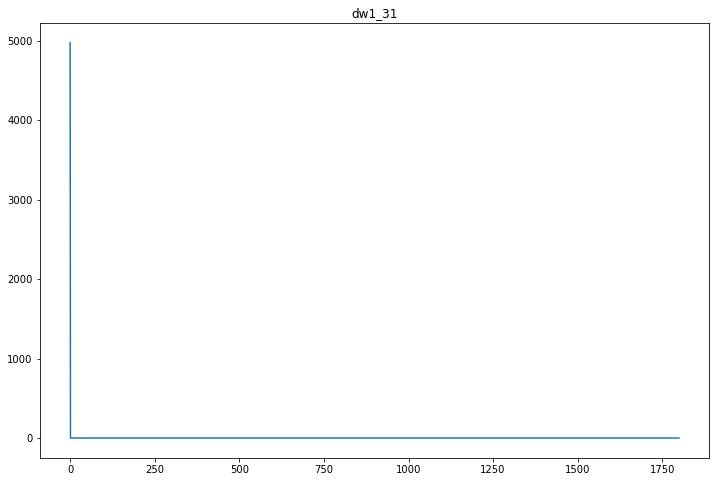

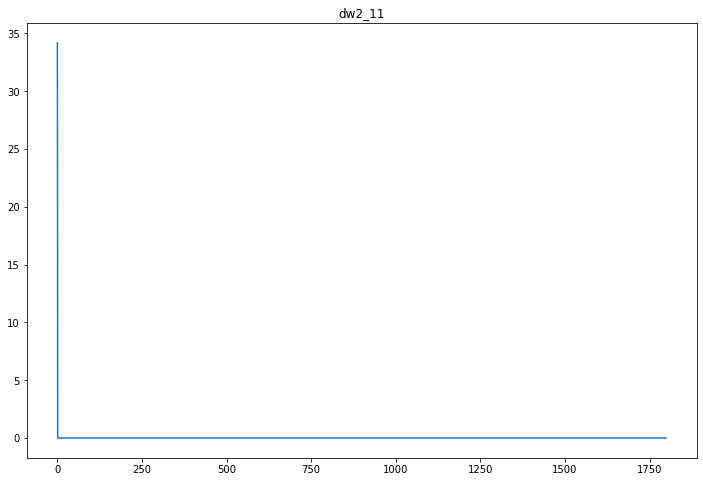

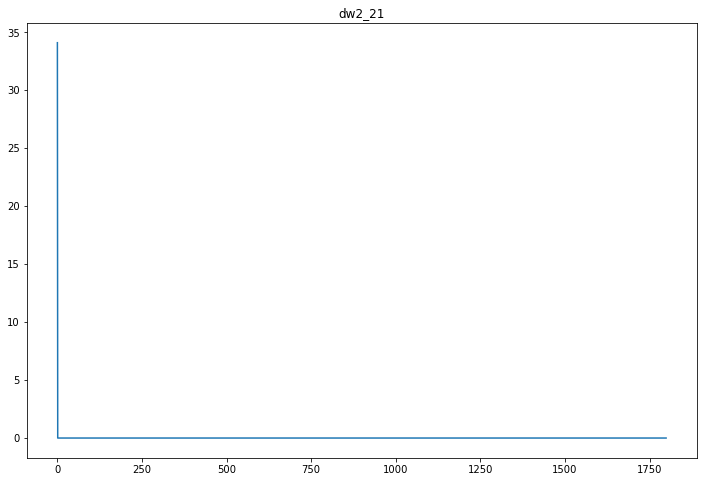

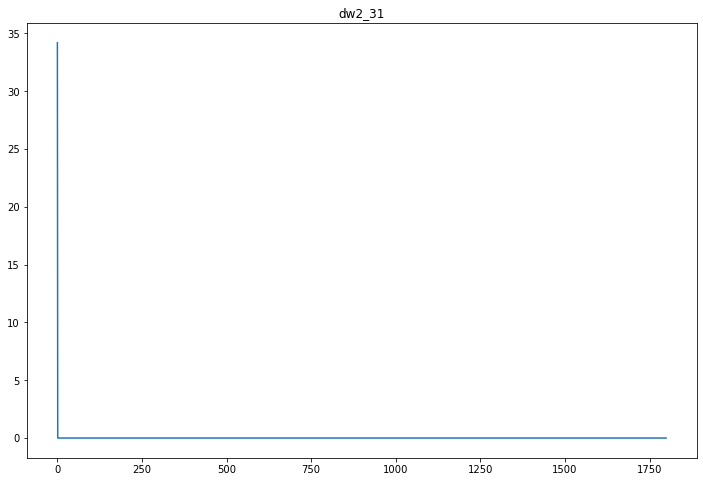

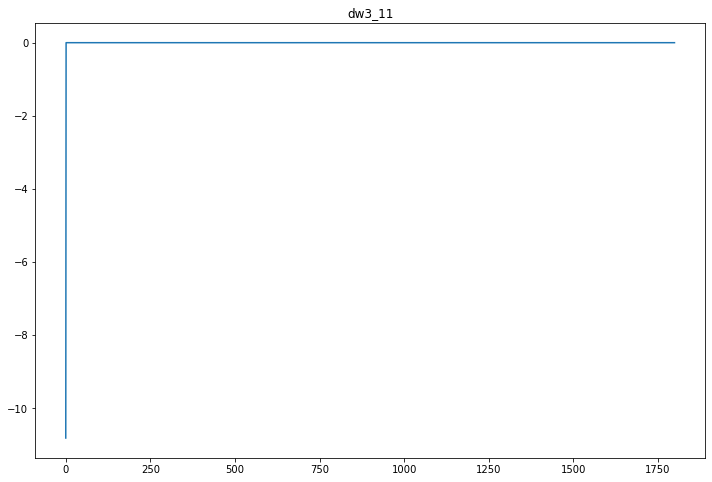

In [27]:
nn_s.plot_dW()

#### the dW of sigmoid are nrealy approaching to zero

## DW  of relu

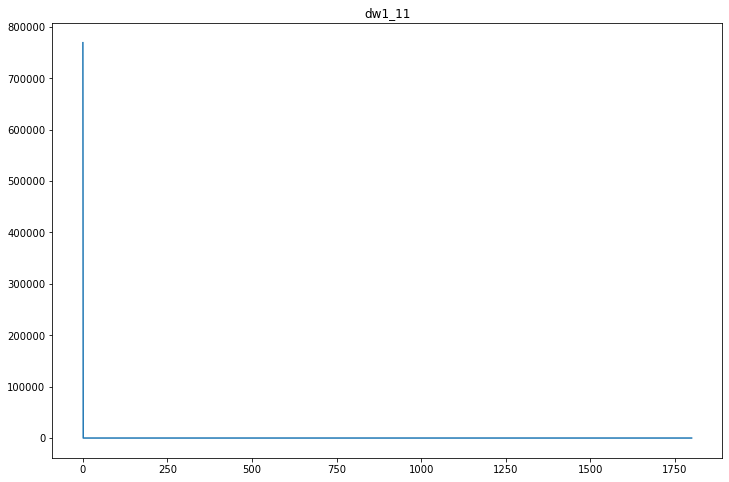

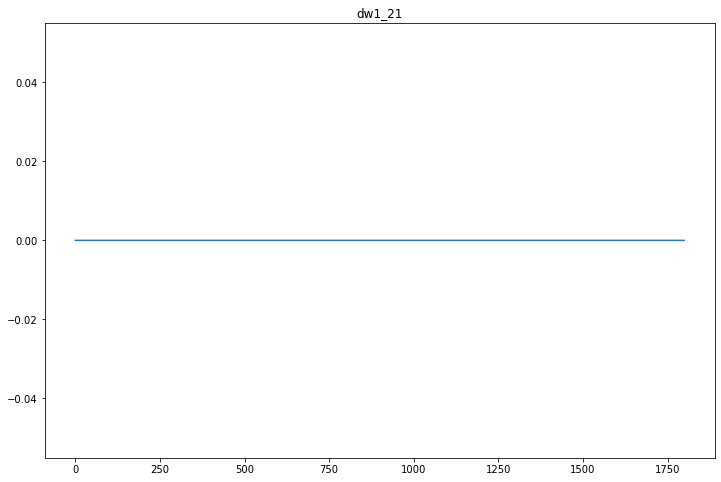

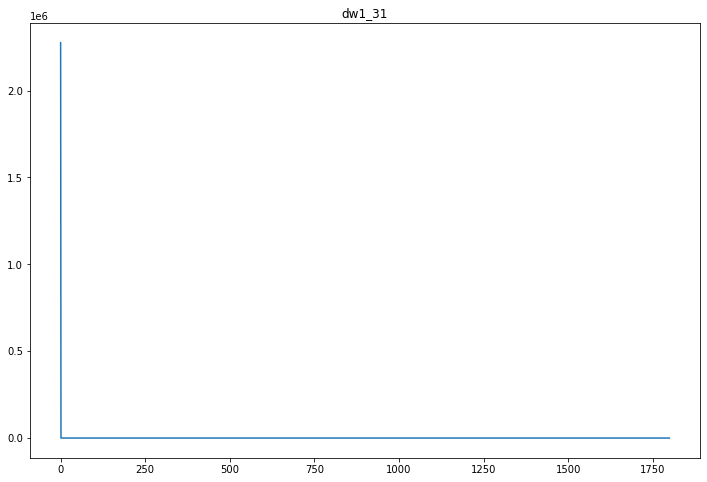

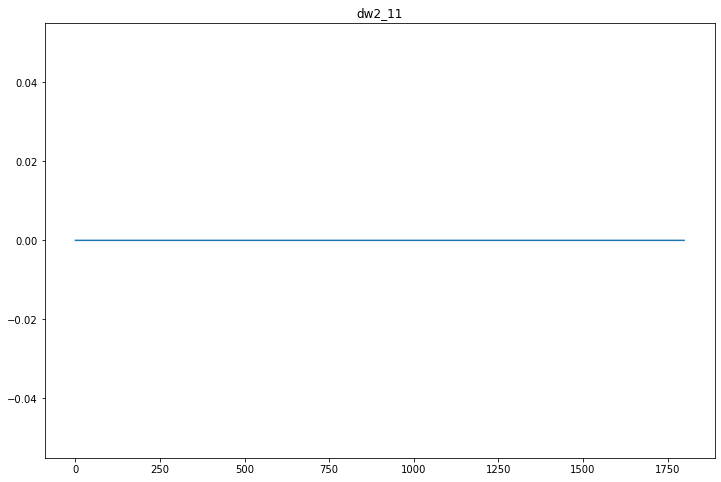

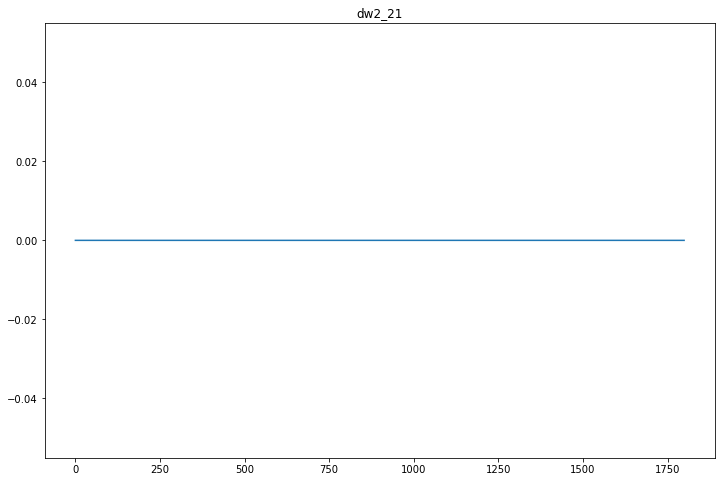

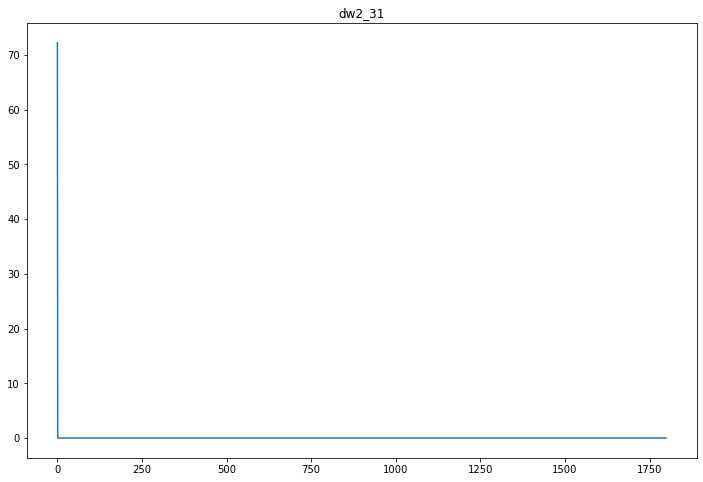

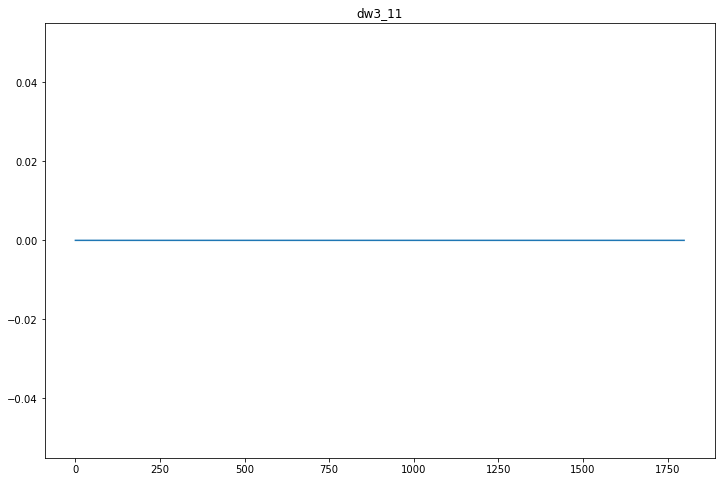

In [28]:
nn_r.plot_dW()

#### With Relu the gradients of weights are converging  as shown from trends

# db of sigmoid

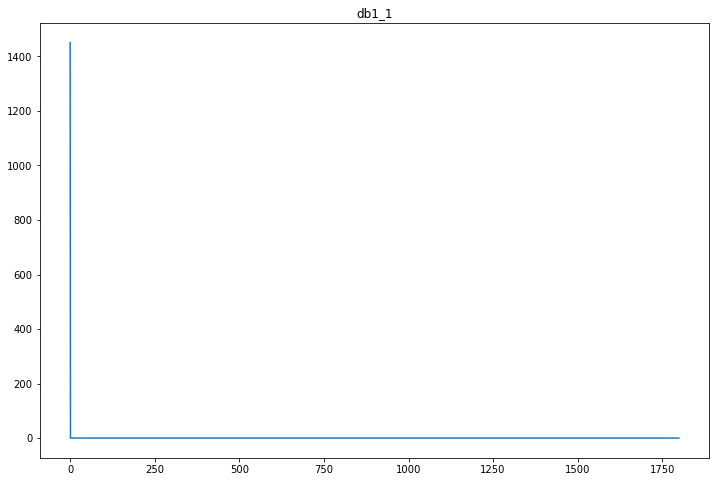

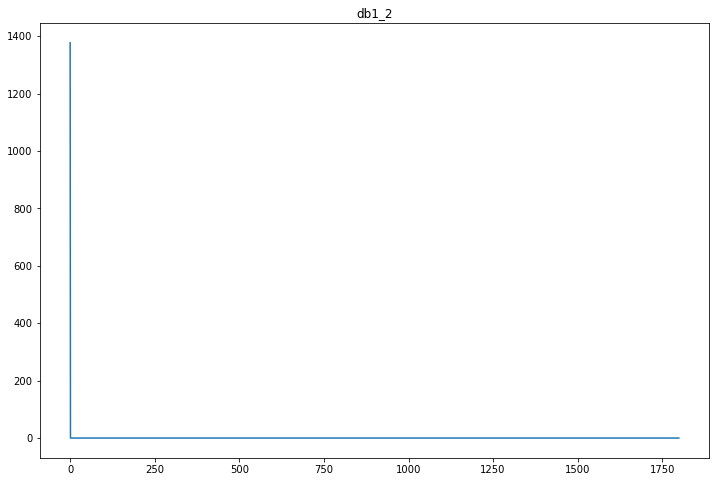

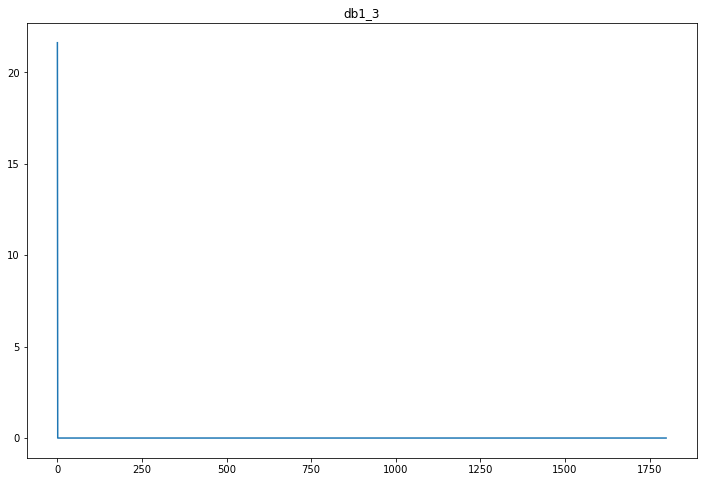

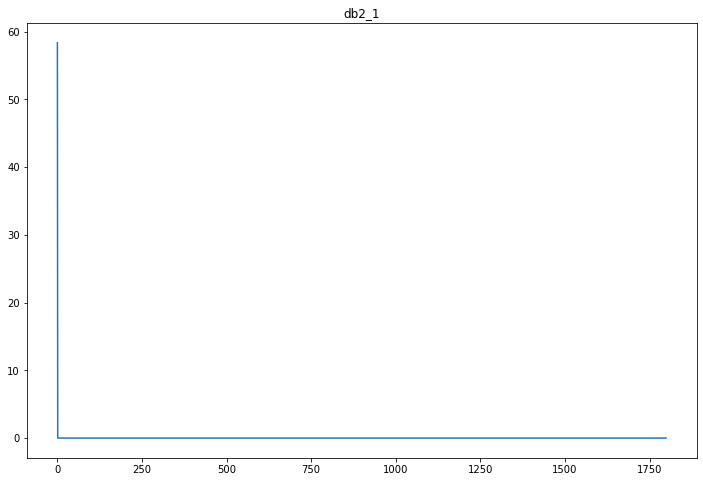

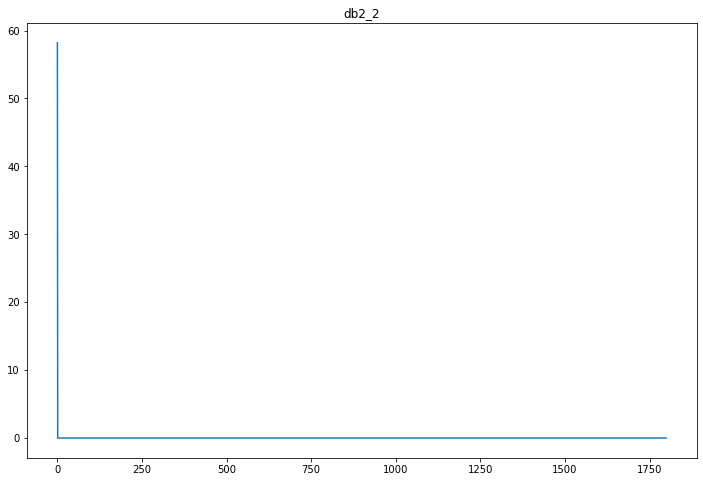

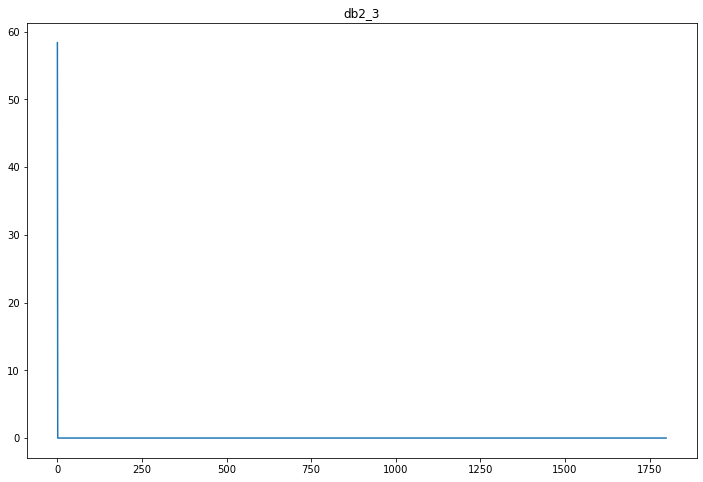

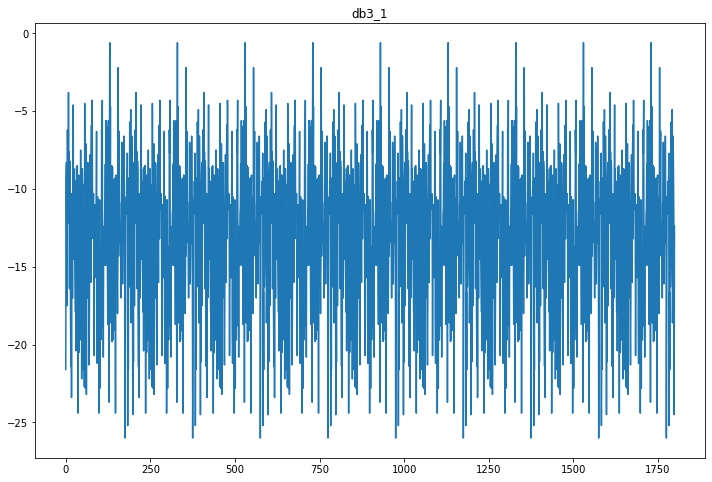

In [29]:
nn_s.plot_db()

#### In sigmoid the db of layer 3 is fluctuating

# db of relu

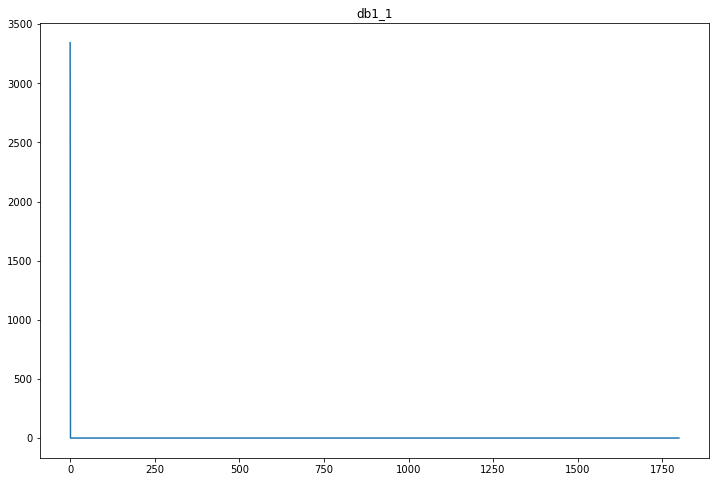

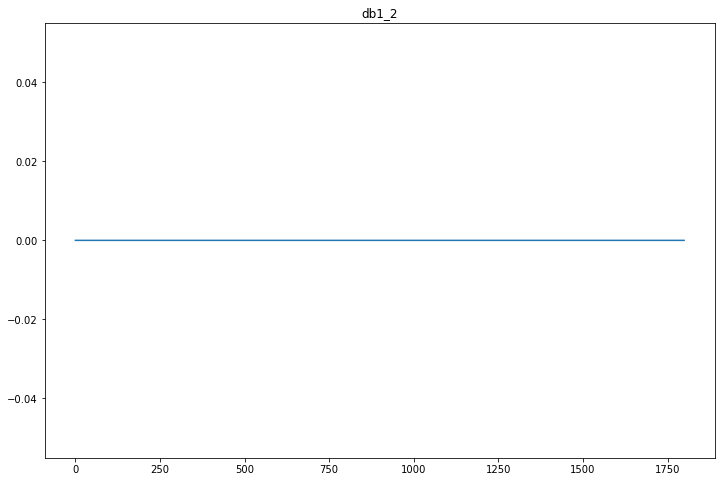

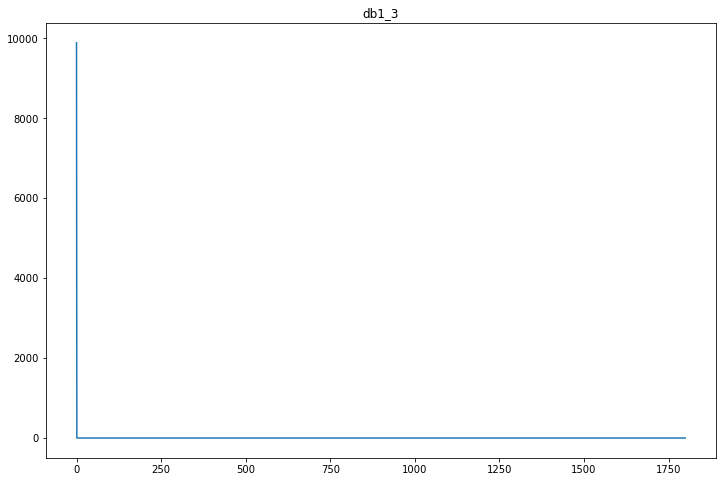

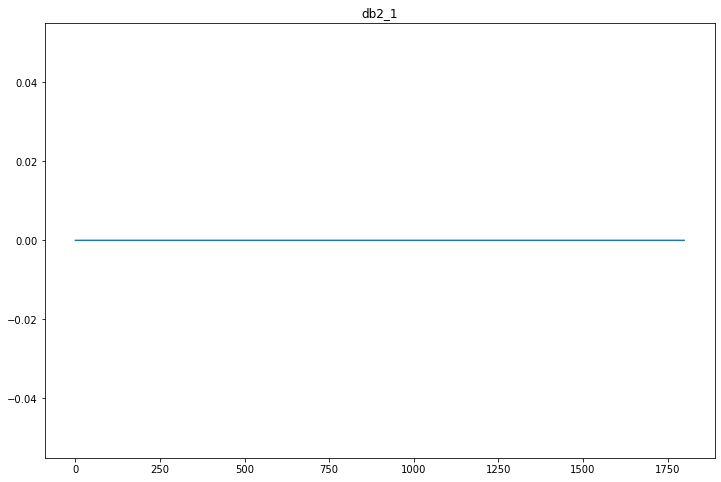

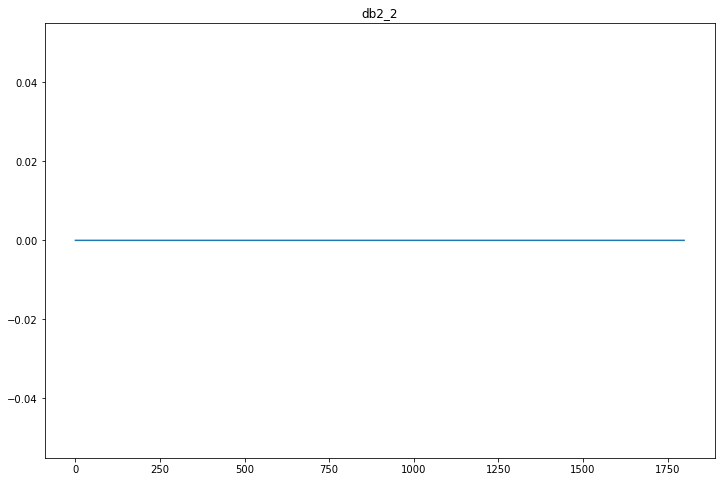

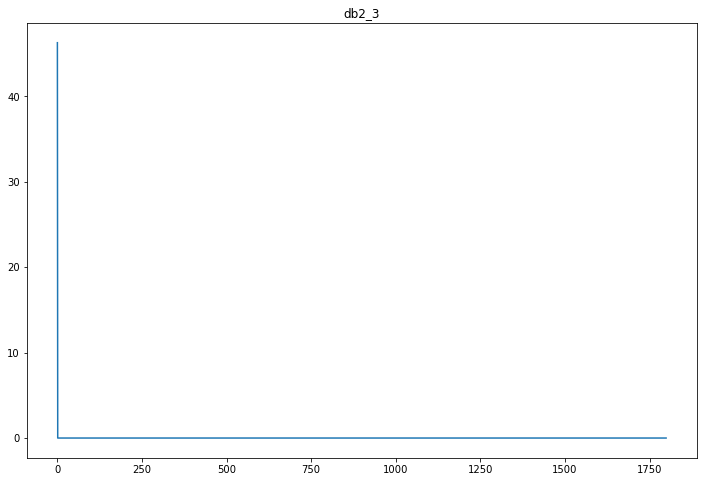

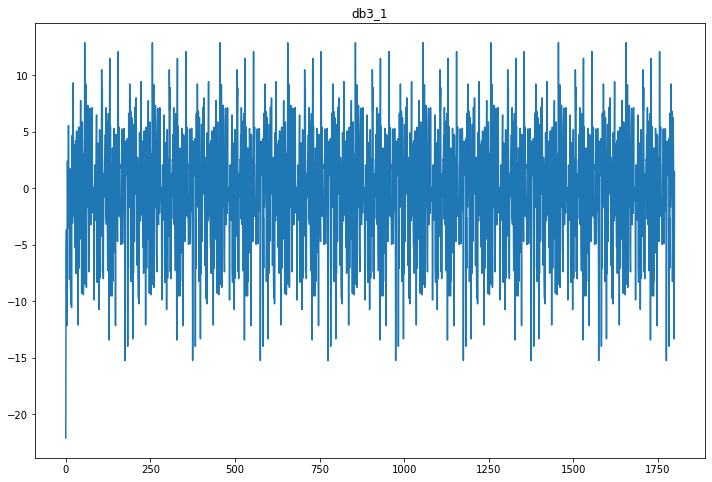

In [30]:
nn_r.plot_db()

### Similarly the db for Relu layer 3 is fluctuating

# Conclusion

In [35]:
print('Relu :',nn_r.cost_mean_r)

print('Sigmoid :',nn_s.cost_mean_r)



Relu : 2.0976512447620825
Sigmoid : 153.76000000000002


## Using the Relu activation function gives the least cost which can be seen in trend

### Hence Relu performed best

### Sigmoid activation performed 2nd best



# Problems faced & future work

### Using tanh activation function gave Nan value idicating its gradient is getting Nan or zero

### this model when run on larger datasets having thousands of rows is using large sustem resourses for storing each neuron weeight bias outup z, activation hence big datasets implementation require high system resourses

# End